#Desafio 4

<p>Neste dataset há várias informações de <b>GPUs</b> diferentes.</p>

<p>O objetivo é <b>prever qual a versão (mais alta) de Direct X</b> sustentada por uma GPU usando outras informações dadas sobre ela.</p>

<p>A coluna "DirectX" representa a versão mais alta presente na GPU;</p>
<p>Há <b>5 versões</b> diferentes de Direct X.</p>
<p>Com 3400 GPUs e mais de 25 features diferentes sobre cada uma</p>


# Importando data e analises iniciais

In [1]:
#import library
import pandas as pd

In [2]:
#read
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CIDAMO/Unidade IV/4-desafio-cidamo-2022/Train.csv', sep=',')

In [3]:
#view data
data

,Nome,Best_Resolution,Boost_Clock,Core_Speed,DVI_Connection,Dedicated,DisplayPort_Connection,HDMI_Connection,Integrated,L2_Cache,...,Power_Connector,Process,ROPs,Resolution_WxH,SLI_Crossfire,Shader,TMUs,Texture_Rate,VGA_Connection,DirectX
0,GDVGF0SH61PY9M2INL2QI3AHTK3HTCKI7VHE7O19,1920 x 1080,1253 MHz,1076 MHz,1.0,Yes,1.0,1.0,No,1024KB,...,None,28nm,32,5120x3200,Yes,5.0,48.0,60 GTexel/s,0.0,12
1,7JK45GGO3YLWSYL,NaN,NaN,\n-,NaN,Yes,NaN,NaN,No,0KB,...,NaN,NaN,NaN,2560x1600,No,4.0,NaN,NaN,NaN,10
2,ZC0GAMPBZGI7HE1,1366 x 768,NaN,810 MHz,NaN,Yes,NaN,NaN,No,256KB,...,NaN,28nm,16,4096x2160,No,5.0,32.0,26 GTexel/s,NaN,12
3,TOASMLBKENKUKMXGHHQ1CN95QZRZB2GF7G35KJMOC,1920 x 1080,1111 MHz,1046 MHz,1.0,Yes,NaN,2.0,No,384KB,...,None,28nm,24,4096x2160,Yes,5.0,80.0,89 GTexel/s,0.0,12
4,G1C3DNBKSFIJ1QH9,1366 x 768,NaN,954 MHz,NaN,Yes,NaN,NaN,No,128KB,...,NaN,28nm,8,4096x2160,No,5.0,32.0,31 GTexel/s,NaN,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3175,6XQ6USO2OKE37VAB91G0JHQM8BDY,1366 x 768,1000 MHz,300 MHz,NaN,No,NaN,NaN,Yes,512KB,...,NaN,14nm,8,4096x2304,No,5.0,16.0,16 GTexel/s,NaN,12
3176,I27LCL2RJZDWZ9XB9QJU7SOUBOR5O235,1440 x 900,NaN,775 MHz,1.0,Yes,NaN,1.0,No,256KB,...,None,40nm,8,2560x1600,Yes,5.0,20.0,16 GTexel/s,1.0,11
3177,UINAFY25UJYCMETQEJC97T2KXUFH89AP,1680 x 1050,NaN,820 MHz,1.0,Yes,NaN,1.0,No,512KB,...,None,40nm,32,2560x1600,Yes,5.0,48.0,39 GTexel/s,0.0,11
3178,9SDMOEXS4208SB7D24OMUDUXH5M6RO4GL8UR4L063A9,NaN,NaN,850 MHz,2.0,Yes,NaN,1.0,No,512KB,...,None,28nm,16,4096x2160,Yes,5.0,32.0,27 GTexel/s,1.0,12


In [4]:
#info data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3180 entries, 0 to 3179
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Nome                    3180 non-null   object 
 1   Best_Resolution         2650 non-null   object 
 2   Boost_Clock             1412 non-null   object 
 3   Core_Speed              3180 non-null   object 
 4   DVI_Connection          2501 non-null   float64
 5   Dedicated               3170 non-null   object 
 6   DisplayPort_Connection  836 non-null    float64
 7   HDMI_Connection         2492 non-null   float64
 8   Integrated              3170 non-null   object 
 9   L2_Cache                3180 non-null   object 
 10  Max_Power               2633 non-null   object 
 11  Memory                  2814 non-null   object 
 12  Memory_Bandwidth        3079 non-null   object 
 13  Memory_Bus              3133 non-null   object 
 14  Memory_Speed            3089 non-null   

Vemos que muitas features estão com Dtype object e com diversos dados faltantes

In [5]:
data.describe()

,DVI_Connection,DisplayPort_Connection,HDMI_Connection,Shader,TMUs,VGA_Connection,DirectX
count,2501.000000,836.000000,2492.000000,3098.000000,2739.000000,2494.000000,3180.000000
mean,1.368653,1.616029,0.864366,4.744061,70.230376,0.212109,11.420755
std,0.707701,1.221438,0.466525,0.644150,54.450249,0.428991,0.964130
min,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,8.000000
25%,1.000000,1.000000,1.000000,5.000000,32.000000,0.000000,11.000000
50%,1.000000,1.000000,1.000000,5.000000,56.000000,0.000000,12.000000
75%,2.000000,3.000000,1.000000,5.000000,112.000000,0.000000,12.000000
max,4.000000,4.000000,3.000000,5.000000,384.000000,4.000000,12.000000


Describe não mostra dados tipo object. 
Vamos tratá-los

Visualizando as features objetos

In [6]:
data.Best_Resolution

0       1920 x 1080
1               NaN
2        1366 x 768
3       1920 x 1080
4        1366 x 768
           ...     
3175     1366 x 768
3176     1440 x 900
3177    1680 x 1050
3178            NaN
3179    3840 x 2160
Name: Best_Resolution, Length: 3180, dtype: object

In [7]:
data.Boost_Clock

0       1253 MHz 
1             NaN
2             NaN
3       1111 MHz 
4             NaN
          ...    
3175    1000 MHz 
3176          NaN
3177          NaN
3178          NaN
3179    1582 MHz 
Name: Boost_Clock, Length: 3180, dtype: object

In [8]:
data.Core_Speed

0       1076 MHz
1           \n- 
2        810 MHz
3       1046 MHz
4        954 MHz
          ...   
3175     300 MHz
3176     775 MHz
3177     820 MHz
3178     850 MHz
3179    1480 MHz
Name: Core_Speed, Length: 3180, dtype: object

In [9]:
data.Texture_Rate

0        60 GTexel/s
1                NaN
2        26 GTexel/s
3        89 GTexel/s
4        31 GTexel/s
            ...     
3175     16 GTexel/s
3176     16 GTexel/s
3177     39 GTexel/s
3178     27 GTexel/s
3179    354 GTexel/s
Name: Texture_Rate, Length: 3180, dtype: object

<b>Os Objetos são compostos por valor numérico e unidade de medida</b>
<p>Vamos tratar estes dados</p>

In [10]:
#listing features objects
import numpy as np
list_object=np.array(['Nome', 'Best_Resolution', 'Boost_Clock', 'Core_Speed', 'Dedicated',
'Integrated', 'L2_Cache', 'Max_Power', 'Memory','Memory_Bandwidth',
'Memory_Bus', 'Memory_Speed', 'Memory_Type','Notebook_GPU', 'PSU','Pixel_Rate',
'Power_Connector', 'Process','ROPs', 'Resolution_WxH', 'SLI_Crossfire','Texture_Rate'])
list_object

array(['Nome', 'Best_Resolution', 'Boost_Clock', 'Core_Speed',
       'Dedicated', 'Integrated', 'L2_Cache', 'Max_Power', 'Memory',
       'Memory_Bandwidth', 'Memory_Bus', 'Memory_Speed', 'Memory_Type',
       'Notebook_GPU', 'PSU', 'Pixel_Rate', 'Power_Connector', 'Process',
       'ROPs', 'Resolution_WxH', 'SLI_Crossfire', 'Texture_Rate'],
      dtype='<U16')

# **Tratamento**

## Tratamento Best_Resolution
Best_Resolution formato _ _ _ _  x  _ _ _ _ 
podemos fazer split em duas colunas: antes e depois do x

In [11]:
data[list_object[1]]

0       1920 x 1080
1               NaN
2        1366 x 768
3       1920 x 1080
4        1366 x 768
           ...     
3175     1366 x 768
3176     1440 x 900
3177    1680 x 1050
3178            NaN
3179    3840 x 2160
Name: Best_Resolution, Length: 3180, dtype: object

In [12]:
best_resolution=data['Best_Resolution'].str.split(' ',expand=True) #Split pelo pela string espaço

best_resolution.drop(labels=1,axis=1,inplace=True) #Drop da coluna que só possui x

best_resolution.rename(columns={0:'Best_Resolution1',2:'Best_Resolution2'},inplace=True) #rename

best_resolution['Nome']=data.Nome #inserindo nome no dataframe

merge_br_data=best_resolution.merge(data) #juntando as coisas

merge_br_data.drop(labels='Best_Resolution',axis=1,inplace=True) #tirando Best antigo

first_column = merge_br_data.pop('Nome') #selecionando nome

merge_br_data.insert(0,'Name',first_column) #Movendo para posição 0

merge_br_data['Best_Resolution1']=merge_br_data.Best_Resolution1.astype('float') #convertendo para numerico

merge_br_data['Best_Resolution2']=merge_br_data.Best_Resolution2.astype('float') #convertendo para numerico

merge_br_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3180 entries, 0 to 3179
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    3180 non-null   object 
 1   Best_Resolution1        2650 non-null   float64
 2   Best_Resolution2        2650 non-null   float64
 3   Boost_Clock             1412 non-null   object 
 4   Core_Speed              3180 non-null   object 
 5   DVI_Connection          2501 non-null   float64
 6   Dedicated               3170 non-null   object 
 7   DisplayPort_Connection  836 non-null    float64
 8   HDMI_Connection         2492 non-null   float64
 9   Integrated              3170 non-null   object 
 10  L2_Cache                3180 non-null   object 
 11  Max_Power               2633 non-null   object 
 12  Memory                  2814 non-null   object 
 13  Memory_Bandwidth        3079 non-null   object 
 14  Memory_Bus              3133 non-null   

## no Boost_Clock


In [13]:
boost_clock=data['Boost_Clock'].str.split(' ',expand=True)
boost_clock.drop(labels=[1,2],axis=1,inplace=True)
boost_clock.rename(columns={0:'Boost_Clock'},inplace=True)
merge_br_data.Boost_Clock.loc[:]=boost_clock.squeeze()
merge_br_data.head()
data2=merge_br_data.rename({'Boost_Clock':'Boost_Clock(MHz)'},axis=1)
data2['Boost_Clock(MHz)']=data2['Boost_Clock(MHz)'].astype('float')
data2.info(verbose=True )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3180 entries, 0 to 3179
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    3180 non-null   object 
 1   Best_Resolution1        2650 non-null   float64
 2   Best_Resolution2        2650 non-null   float64
 3   Boost_Clock(MHz)        1412 non-null   float64
 4   Core_Speed              3180 non-null   object 
 5   DVI_Connection          2501 non-null   float64
 6   Dedicated               3170 non-null   object 
 7   DisplayPort_Connection  836 non-null    float64
 8   HDMI_Connection         2492 non-null   float64
 9   Integrated              3170 non-null   object 
 10  L2_Cache                3180 non-null   object 
 11  Max_Power               2633 non-null   object 
 12  Memory                  2814 non-null   object 
 13  Memory_Bandwidth        3079 non-null   object 
 14  Memory_Bus              3133 non-null   

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


##Core Speed

In [14]:
data2.Core_Speed

0       1076 MHz
1           \n- 
2        810 MHz
3       1046 MHz
4        954 MHz
          ...   
3175     300 MHz
3176     775 MHz
3177     820 MHz
3178     850 MHz
3179    1480 MHz
Name: Core_Speed, Length: 3180, dtype: object

In [15]:
core_speed=data2['Core_Speed'].str.split(' ',expand=True)
core_speed.drop(labels=[1],axis=1,inplace=True)
core_speed.rename(columns={0:'Core_Speed'},inplace=True)
core_speed
data2.Core_Speed.loc[:]=core_speed.squeeze()
data2.Core_Speed
data2.rename({'Core_Speed':'Core_Speed(MHz)'},axis=1,inplace=True)
data2.loc[(data2['Core_Speed(MHz)']=='\n'),['Core_Speed(MHz)']]='0'
data2.loc[(data2['Core_Speed(MHz)']=='\n-'),['Core_Speed(MHz)']]='0'
data2['Core_Speed(MHz)']=data2['Core_Speed(MHz)'].astype('float')
data2.info(verbose=True )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3180 entries, 0 to 3179
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    3180 non-null   object 
 1   Best_Resolution1        2650 non-null   float64
 2   Best_Resolution2        2650 non-null   float64
 3   Boost_Clock(MHz)        1412 non-null   float64
 4   Core_Speed(MHz)         3180 non-null   float64
 5   DVI_Connection          2501 non-null   float64
 6   Dedicated               3170 non-null   object 
 7   DisplayPort_Connection  836 non-null    float64
 8   HDMI_Connection         2492 non-null   float64
 9   Integrated              3170 non-null   object 
 10  L2_Cache                3180 non-null   object 
 11  Max_Power               2633 non-null   object 
 12  Memory                  2814 non-null   object 
 13  Memory_Bandwidth        3079 non-null   object 
 14  Memory_Bus              3133 non-null   

##Dedicated

In [16]:
data2.loc[(data2.Dedicated=='Yes'),['Dedicated']]=1
data2.loc[(data2.Dedicated=='No'),['Dedicated']]=0
data2['Dedicated']=data2['Dedicated'].astype('float')
data2.info(verbose=True )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3180 entries, 0 to 3179
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    3180 non-null   object 
 1   Best_Resolution1        2650 non-null   float64
 2   Best_Resolution2        2650 non-null   float64
 3   Boost_Clock(MHz)        1412 non-null   float64
 4   Core_Speed(MHz)         3180 non-null   float64
 5   DVI_Connection          2501 non-null   float64
 6   Dedicated               3170 non-null   float64
 7   DisplayPort_Connection  836 non-null    float64
 8   HDMI_Connection         2492 non-null   float64
 9   Integrated              3170 non-null   object 
 10  L2_Cache                3180 non-null   object 
 11  Max_Power               2633 non-null   object 
 12  Memory                  2814 non-null   object 
 13  Memory_Bandwidth        3079 non-null   object 
 14  Memory_Bus              3133 non-null   

##Integrated

In [17]:
data2.loc[(data2.Integrated=='Yes'),['Integrated']]=1
data2.loc[(data2.Integrated=='No'),['Integrated']]=0
data2['Integrated']=data2['Integrated'].astype('float')
data2.info(verbose=True )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3180 entries, 0 to 3179
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    3180 non-null   object 
 1   Best_Resolution1        2650 non-null   float64
 2   Best_Resolution2        2650 non-null   float64
 3   Boost_Clock(MHz)        1412 non-null   float64
 4   Core_Speed(MHz)         3180 non-null   float64
 5   DVI_Connection          2501 non-null   float64
 6   Dedicated               3170 non-null   float64
 7   DisplayPort_Connection  836 non-null    float64
 8   HDMI_Connection         2492 non-null   float64
 9   Integrated              3170 non-null   float64
 10  L2_Cache                3180 non-null   object 
 11  Max_Power               2633 non-null   object 
 12  Memory                  2814 non-null   object 
 13  Memory_Bandwidth        3079 non-null   object 
 14  Memory_Bus              3133 non-null   

##L2_Cache

In [18]:
L2_Cache=data2['L2_Cache'].str.split('K',expand=True)
L2_Cache.drop(labels=[1],axis=1,inplace=True)
L2_Cache.rename(columns={0:'L2_Cache'},inplace=True)
data2.L2_Cache.loc[:]=L2_Cache.squeeze()
data2.rename({'L2_Cache':'L2_Cache(KB)'},axis=1,inplace=True)
data2['L2_Cache(KB)']=data2['L2_Cache(KB)'].astype('float')
data2.info(verbose=True )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3180 entries, 0 to 3179
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    3180 non-null   object 
 1   Best_Resolution1        2650 non-null   float64
 2   Best_Resolution2        2650 non-null   float64
 3   Boost_Clock(MHz)        1412 non-null   float64
 4   Core_Speed(MHz)         3180 non-null   float64
 5   DVI_Connection          2501 non-null   float64
 6   Dedicated               3170 non-null   float64
 7   DisplayPort_Connection  836 non-null    float64
 8   HDMI_Connection         2492 non-null   float64
 9   Integrated              3170 non-null   float64
 10  L2_Cache(KB)            3180 non-null   float64
 11  Max_Power               2633 non-null   object 
 12  Memory                  2814 non-null   object 
 13  Memory_Bandwidth        3079 non-null   object 
 14  Memory_Bus              3133 non-null   

## Max_Power

In [19]:
Max_Power=data2['Max_Power'].str.split(' ',expand=True)
Max_Power.drop(labels=[1],axis=1,inplace=True)
Max_Power.rename(columns={0:'Max_Power'},inplace=True)
data2.Max_Power.loc[:]=Max_Power.squeeze()
data2.rename({'Max_Power':'Max_Power(W)'},axis=1,inplace=True)
data2['Max_Power(W)']=data2['Max_Power(W)'].astype('float')
data2.info(verbose=True )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3180 entries, 0 to 3179
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    3180 non-null   object 
 1   Best_Resolution1        2650 non-null   float64
 2   Best_Resolution2        2650 non-null   float64
 3   Boost_Clock(MHz)        1412 non-null   float64
 4   Core_Speed(MHz)         3180 non-null   float64
 5   DVI_Connection          2501 non-null   float64
 6   Dedicated               3170 non-null   float64
 7   DisplayPort_Connection  836 non-null    float64
 8   HDMI_Connection         2492 non-null   float64
 9   Integrated              3170 non-null   float64
 10  L2_Cache(KB)            3180 non-null   float64
 11  Max_Power(W)            2633 non-null   float64
 12  Memory                  2814 non-null   object 
 13  Memory_Bandwidth        3079 non-null   object 
 14  Memory_Bus              3133 non-null   

## Memory

In [20]:
Memory=data2['Memory'].str.split(' ',expand=True)
Memory.drop(labels=[1,2],axis=1,inplace=True)
Memory.rename(columns={0:'Memory'},inplace=True)
data2.Memory.loc[:]=Memory.squeeze()
data2.rename({'Memory':'Memory(MB)'},axis=1,inplace=True)
data2['Memory(MB)']=data2['Memory(MB)'].astype('float')
data2.info(verbose=True )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3180 entries, 0 to 3179
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    3180 non-null   object 
 1   Best_Resolution1        2650 non-null   float64
 2   Best_Resolution2        2650 non-null   float64
 3   Boost_Clock(MHz)        1412 non-null   float64
 4   Core_Speed(MHz)         3180 non-null   float64
 5   DVI_Connection          2501 non-null   float64
 6   Dedicated               3170 non-null   float64
 7   DisplayPort_Connection  836 non-null    float64
 8   HDMI_Connection         2492 non-null   float64
 9   Integrated              3170 non-null   float64
 10  L2_Cache(KB)            3180 non-null   float64
 11  Max_Power(W)            2633 non-null   float64
 12  Memory(MB)              2814 non-null   float64
 13  Memory_Bandwidth        3079 non-null   object 
 14  Memory_Bus              3133 non-null   

## Memory_Bandwidth

Neste temos duas unidades GB e MB

In [21]:
change=data2.loc[(data2.Memory_Bandwidth.str.contains('MB/sec')==True), ['Memory_Bandwidth']] #encontrando os MB
change.values[0][0] #Verificando

'1000MB/sec'

In [22]:
data2.loc[(data2.Memory_Bandwidth.str.contains('MB/sec')==True), ['Memory_Bandwidth']]='1GB/sec' #colocando na notação GB
data2.loc[(data2.Memory_Bandwidth.str.contains('MB/sec')==True), ['Memory_Bandwidth']] # verificando que não ficou nada de MB

,Memory_Bandwidth


In [23]:
Memory_Bandwidth=data2['Memory_Bandwidth'].str.split('G',expand=True)
Memory_Bandwidth
Memory_Bandwidth.drop(labels=[1],axis=1,inplace=True)
Memory_Bandwidth.rename(columns={0:'Memory_Bandwidth'},inplace=True)
data2.Memory_Bandwidth.loc[:]=Memory_Bandwidth.squeeze()
data2.rename({'Memory_Bandwidth':'Memory_Bandwidth(GB/sec)'},axis=1,inplace=True)
data2['Memory_Bandwidth(GB/sec)']=data2['Memory_Bandwidth(GB/sec)'].astype('float')
data2.info(verbose=True )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3180 entries, 0 to 3179
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      3180 non-null   object 
 1   Best_Resolution1          2650 non-null   float64
 2   Best_Resolution2          2650 non-null   float64
 3   Boost_Clock(MHz)          1412 non-null   float64
 4   Core_Speed(MHz)           3180 non-null   float64
 5   DVI_Connection            2501 non-null   float64
 6   Dedicated                 3170 non-null   float64
 7   DisplayPort_Connection    836 non-null    float64
 8   HDMI_Connection           2492 non-null   float64
 9   Integrated                3170 non-null   float64
 10  L2_Cache(KB)              3180 non-null   float64
 11  Max_Power(W)              2633 non-null   float64
 12  Memory(MB)                2814 non-null   float64
 13  Memory_Bandwidth(GB/sec)  3079 non-null   float64
 14  Memory_B

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


## Memory_Bus

In [24]:
Memory_Bus=data2['Memory_Bus'].str.split(' ',expand=True)
Memory_Bus.drop(labels=[1,2],axis=1,inplace=True)
Memory_Bus.rename(columns={0:'Memory_Bus'},inplace=True)
data2.Memory_Bus.loc[:]=Memory_Bus.squeeze()
data2.rename({'Memory_Bus':'Memory_Bus(Bit)'},axis=1,inplace=True)
data2['Memory_Bus(Bit)']=data2['Memory_Bus(Bit)'].astype('float')
data2.info(verbose=True )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3180 entries, 0 to 3179
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      3180 non-null   object 
 1   Best_Resolution1          2650 non-null   float64
 2   Best_Resolution2          2650 non-null   float64
 3   Boost_Clock(MHz)          1412 non-null   float64
 4   Core_Speed(MHz)           3180 non-null   float64
 5   DVI_Connection            2501 non-null   float64
 6   Dedicated                 3170 non-null   float64
 7   DisplayPort_Connection    836 non-null    float64
 8   HDMI_Connection           2492 non-null   float64
 9   Integrated                3170 non-null   float64
 10  L2_Cache(KB)              3180 non-null   float64
 11  Max_Power(W)              2633 non-null   float64
 12  Memory(MB)                2814 non-null   float64
 13  Memory_Bandwidth(GB/sec)  3079 non-null   float64
 14  Memory_B

## Memory_Speed

In [25]:
Memory_Speed=data2['Memory_Speed'].str.split(' ',expand=True)
Memory_Speed.drop(labels=[1],axis=1,inplace=True)
Memory_Speed.rename(columns={0:'Memory_Speed'},inplace=True)
data2.Memory_Speed.loc[:]=Memory_Speed.squeeze()
data2.rename({'Memory_Speed':'Memory_Speed(MHz)'},axis=1,inplace=True)
data2['Memory_Speed(MHz)']=data2['Memory_Speed(MHz)'].astype('float')
data2.info(verbose=True )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3180 entries, 0 to 3179
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      3180 non-null   object 
 1   Best_Resolution1          2650 non-null   float64
 2   Best_Resolution2          2650 non-null   float64
 3   Boost_Clock(MHz)          1412 non-null   float64
 4   Core_Speed(MHz)           3180 non-null   float64
 5   DVI_Connection            2501 non-null   float64
 6   Dedicated                 3170 non-null   float64
 7   DisplayPort_Connection    836 non-null    float64
 8   HDMI_Connection           2492 non-null   float64
 9   Integrated                3170 non-null   float64
 10  L2_Cache(KB)              3180 non-null   float64
 11  Max_Power(W)              2633 non-null   float64
 12  Memory(MB)                2814 non-null   float64
 13  Memory_Bandwidth(GB/sec)  3079 non-null   float64
 14  Memory_B

## Memory_Type

Temos várias tipos de memória podemos classificar por numeros inteiros ordinais

In [26]:
np.array(set(data2.Memory_Type.values))

array({nan, 'DDR4', 'GDDR5X', 'GDDR2', 'GDDR5', 'eDRAM', 'DDR', 'DDR2', 'HBM-1', 'GDDR3', 'HBM-2', 'GDDR4', 'DDR3'},
      dtype=object)

In [27]:
from numpy import array
from sklearn.preprocessing import LabelEncoder
# define example
values = np.array(data2.Memory_Type)
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)


['GDDR5' 'GDDR3' 'DDR3' ... 'GDDR5' 'DDR3' 'GDDR5X']
[7 5 2 ... 7 2 8]


In [28]:
data2.drop('Memory_Type',axis=1,inplace=True)
data2.insert(16,'Memory_Type',integer_encoded)
data2.loc[(data2.Memory_Type==12),['Memory_Type']]=np.nan
data2.loc[(data2.Memory_Type.isnull()==True),['Memory_Type']]
#data2.info()

,Memory_Type
51,NaN
82,NaN
201,NaN
250,NaN
605,NaN
651,NaN
653,NaN
712,NaN
736,NaN
750,NaN


## Notebook_GPU

In [29]:
data2.Notebook_GPU

0        No
1       Yes
2       Yes
3        No
4       Yes
       ... 
3175    Yes
3176     No
3177     No
3178     No
3179     No
Name: Notebook_GPU, Length: 3180, dtype: object

In [30]:
data2.loc[(data2.Notebook_GPU=='Yes'),['Notebook_GPU']]=1
data2.loc[(data2.Notebook_GPU=='No'),['Notebook_GPU']]=0
data2['Notebook_GPU']=data2['Notebook_GPU'].astype('float')
data2.info(verbose=True )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3180 entries, 0 to 3179
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      3180 non-null   object 
 1   Best_Resolution1          2650 non-null   float64
 2   Best_Resolution2          2650 non-null   float64
 3   Boost_Clock(MHz)          1412 non-null   float64
 4   Core_Speed(MHz)           3180 non-null   float64
 5   DVI_Connection            2501 non-null   float64
 6   Dedicated                 3170 non-null   float64
 7   DisplayPort_Connection    836 non-null    float64
 8   HDMI_Connection           2492 non-null   float64
 9   Integrated                3170 non-null   float64
 10  L2_Cache(KB)              3180 non-null   float64
 11  Max_Power(W)              2633 non-null   float64
 12  Memory(MB)                2814 non-null   float64
 13  Memory_Bandwidth(GB/sec)  3079 non-null   float64
 14  Memory_B

## PSU

In [31]:
data2['PSU']

0       350 Watt & 23 Amps
1                      NaN
2                      NaN
3       450 Watt & 24 Amps
4                      NaN
               ...        
3175                   NaN
3176              400 Watt
3177                   NaN
3178              400 Watt
3179    600 Watt & 42 Amps
Name: PSU, Length: 3180, dtype: object

Neste caso podemos dividir em duas colunas PSU(W) e PSU(A) para Watt e Amps

In [32]:
PSU=data2['PSU'].str.split(' ',expand=True)
PSU.drop(labels=[1,2,4],axis=1,inplace=True)
PSU.rename(columns={0:'PSU(W)',3:'PSU(A)'},inplace=True)
data2.insert(18,'PSU(W)',PSU.values[:,0])
data2.insert(19,'PSU(A)',PSU.values[:,1])
data2.drop('PSU',axis=1,inplace=True)
data2['PSU(W)']=data2['PSU(W)'].astype('float')
data2['PSU(A)']=data2['PSU(A)'].astype('float')
data2.info(verbose=True )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3180 entries, 0 to 3179
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      3180 non-null   object 
 1   Best_Resolution1          2650 non-null   float64
 2   Best_Resolution2          2650 non-null   float64
 3   Boost_Clock(MHz)          1412 non-null   float64
 4   Core_Speed(MHz)           3180 non-null   float64
 5   DVI_Connection            2501 non-null   float64
 6   Dedicated                 3170 non-null   float64
 7   DisplayPort_Connection    836 non-null    float64
 8   HDMI_Connection           2492 non-null   float64
 9   Integrated                3170 non-null   float64
 10  L2_Cache(KB)              3180 non-null   float64
 11  Max_Power(W)              2633 non-null   float64
 12  Memory(MB)                2814 non-null   float64
 13  Memory_Bandwidth(GB/sec)  3079 non-null   float64
 14  Memory_B

## Pixel_Rate                

In [33]:
data2.Pixel_Rate

0        40 GPixel/s
1                NaN
2        13 GPixel/s
3        27 GPixel/s
4         8 GPixel/s
            ...     
3175      8 GPixel/s
3176      6 GPixel/s
3177     26 GPixel/s
3178     14 GPixel/s
3179    152 GPixel/s
Name: Pixel_Rate, Length: 3180, dtype: object

In [34]:
Pixel_Rate=data2['Pixel_Rate'].str.split(' ',expand=True)
Pixel_Rate.drop(labels=[1],axis=1,inplace=True)
Pixel_Rate.rename(columns={0:'Pixel_Rate'},inplace=True)
data2.Pixel_Rate.loc[:]=Pixel_Rate.squeeze()
data2.rename({'Pixel_Rate':'Pixel_Rate(GPixel/s)'},axis=1,inplace=True)
data2['Pixel_Rate(GPixel/s)']=data2['Pixel_Rate(GPixel/s)'].astype('float')
data2.info(verbose=True )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3180 entries, 0 to 3179
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      3180 non-null   object 
 1   Best_Resolution1          2650 non-null   float64
 2   Best_Resolution2          2650 non-null   float64
 3   Boost_Clock(MHz)          1412 non-null   float64
 4   Core_Speed(MHz)           3180 non-null   float64
 5   DVI_Connection            2501 non-null   float64
 6   Dedicated                 3170 non-null   float64
 7   DisplayPort_Connection    836 non-null    float64
 8   HDMI_Connection           2492 non-null   float64
 9   Integrated                3170 non-null   float64
 10  L2_Cache(KB)              3180 non-null   float64
 11  Max_Power(W)              2633 non-null   float64
 12  Memory(MB)                2814 non-null   float64
 13  Memory_Bandwidth(GB/sec)  3079 non-null   float64
 14  Memory_B

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


## Power_Connector

In [35]:
from pandas.core.api import notnull
print(len(data2.loc[(data.Power_Connector=='None '),['Power_Connector']]))
data2.Power_Connector.isnull().sum()

1513


646

Vemos que mais de 2100 dados são inexistentes, portanto não vamos fazer encoding

## Process

In [36]:
data2.Process

0       28nm
1        NaN
2       28nm
3       28nm
4       28nm
        ... 
3175    14nm
3176    40nm
3177    40nm
3178    28nm
3179    16nm
Name: Process, Length: 3180, dtype: object

In [37]:
Process=data2['Process'].str.split('n',expand=True)
Process.drop(labels=[1],axis=1,inplace=True)
Process.rename(columns={0:'Process'},inplace=True)
data2.Process.loc[:]=Process.squeeze()
data2.rename({'Process':'Process(nm)'},axis=1,inplace=True)
data2['Process(nm)']=data2['Process(nm)'].astype('float')
data2.info(verbose=True )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3180 entries, 0 to 3179
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      3180 non-null   object 
 1   Best_Resolution1          2650 non-null   float64
 2   Best_Resolution2          2650 non-null   float64
 3   Boost_Clock(MHz)          1412 non-null   float64
 4   Core_Speed(MHz)           3180 non-null   float64
 5   DVI_Connection            2501 non-null   float64
 6   Dedicated                 3170 non-null   float64
 7   DisplayPort_Connection    836 non-null    float64
 8   HDMI_Connection           2492 non-null   float64
 9   Integrated                3170 non-null   float64
 10  L2_Cache(KB)              3180 non-null   float64
 11  Max_Power(W)              2633 non-null   float64
 12  Memory(MB)                2814 non-null   float64
 13  Memory_Bandwidth(GB/sec)  3079 non-null   float64
 14  Memory_B

##ROPs

In [38]:
data2['ROPs']

0            32
1           NaN
2            16
3            24
4             8
         ...   
3175          8
3176          8
3177         32
3178         16
3179    48 (x2)
Name: ROPs, Length: 3180, dtype: object

In [39]:
ROPs=data2['ROPs'].str.split(' ',expand=True)
set(ROPs[1].values) #verificando os valores

{'(x2)', '(x3)', '(x4)', None, nan}

In [40]:
ROPs[0]=ROPs[0].astype(float)
ROPs.loc[(ROPs[1].str.contains('2')==True),[0]]=ROPs.loc[(ROPs[1].str.contains('2')==True),[0]]*2
ROPs.loc[(ROPs[1].str.contains('2')==True),[0]]

,0
5,192.0
10,128.0
20,192.0
23,128.0
49,64.0
...,...
3124,32.0
3132,56.0
3144,32.0
3146,192.0


In [41]:
ROPs.loc[(ROPs[1].str.contains('3')==True),[0]]=ROPs.loc[(ROPs[1].str.contains('3')==True),[0]]*3
ROPs.loc[(ROPs[1].str.contains('3')==True),[0]]

,0
236,192.0
945,144.0
1218,72.0
1396,96.0
2059,96.0
2517,192.0


In [42]:
ROPs.loc[(ROPs[1].str.contains('4')==True),[0]]=ROPs.loc[(ROPs[1].str.contains('4')==True),[0]]*4
ROPs.loc[(ROPs[1].str.contains('4')==True),[0]]

,0
63,88.0
156,88.0
220,88.0
316,64.0
320,88.0
330,128.0
508,88.0
517,88.0
677,88.0
833,88.0


In [43]:
ROPs.drop(labels=[1],axis=1,inplace=True)
ROPs.rename(columns={0:'ROPs'},inplace=True)
data2.ROPs.loc[:]=ROPs.squeeze()
data2['ROPs']=data2['ROPs'].astype('float')
data2.info(verbose=True )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3180 entries, 0 to 3179
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      3180 non-null   object 
 1   Best_Resolution1          2650 non-null   float64
 2   Best_Resolution2          2650 non-null   float64
 3   Boost_Clock(MHz)          1412 non-null   float64
 4   Core_Speed(MHz)           3180 non-null   float64
 5   DVI_Connection            2501 non-null   float64
 6   Dedicated                 3170 non-null   float64
 7   DisplayPort_Connection    836 non-null    float64
 8   HDMI_Connection           2492 non-null   float64
 9   Integrated                3170 non-null   float64
 10  L2_Cache(KB)              3180 non-null   float64
 11  Max_Power(W)              2633 non-null   float64
 12  Memory(MB)                2814 non-null   float64
 13  Memory_Bandwidth(GB/sec)  3079 non-null   float64
 14  Memory_B

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


## Resolution_WxH

In [44]:
data2.Resolution_WxH

0       5120x3200
1       2560x1600
2       4096x2160
3       4096x2160
4       4096x2160
          ...    
3175    4096x2304
3176    2560x1600
3177    2560x1600
3178    4096x2160
3179    7680x3200
Name: Resolution_WxH, Length: 3180, dtype: object

Vamos criar duas colunas a Resolution(W) e a Resolution(H)

In [45]:
Resolution_WxH=data2['Resolution_WxH'].str.split('x',expand=True)
Resolution_WxH.rename({0:'Resolution_W',1:'Resolution_H'},axis=1,inplace=True)
data2.insert(24,'Resolution_W',Resolution_WxH.Resolution_W.values)
data2.insert(24,'Resolution_H',Resolution_WxH.Resolution_H.values)
data2.drop('Resolution_WxH',axis=1,inplace=True)
data2.Resolution_H=data2.Resolution_H.astype(float)
data2.Resolution_W=data2.Resolution_W.astype(float)
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3180 entries, 0 to 3179
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      3180 non-null   object 
 1   Best_Resolution1          2650 non-null   float64
 2   Best_Resolution2          2650 non-null   float64
 3   Boost_Clock(MHz)          1412 non-null   float64
 4   Core_Speed(MHz)           3180 non-null   float64
 5   DVI_Connection            2501 non-null   float64
 6   Dedicated                 3170 non-null   float64
 7   DisplayPort_Connection    836 non-null    float64
 8   HDMI_Connection           2492 non-null   float64
 9   Integrated                3170 non-null   float64
 10  L2_Cache(KB)              3180 non-null   float64
 11  Max_Power(W)              2633 non-null   float64
 12  Memory(MB)                2814 non-null   float64
 13  Memory_Bandwidth(GB/sec)  3079 non-null   float64
 14  Memory_B

## SLI_Crossfire

In [46]:
set(data2.SLI_Crossfire.values)

{'No', 'Yes'}

In [47]:
data2.loc[(data2.SLI_Crossfire=='Yes'),['SLI_Crossfire']]=1
data2.loc[(data2.SLI_Crossfire=='No'),['SLI_Crossfire']]=0
data2.SLI_Crossfire=data2.SLI_Crossfire.astype(float)
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3180 entries, 0 to 3179
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      3180 non-null   object 
 1   Best_Resolution1          2650 non-null   float64
 2   Best_Resolution2          2650 non-null   float64
 3   Boost_Clock(MHz)          1412 non-null   float64
 4   Core_Speed(MHz)           3180 non-null   float64
 5   DVI_Connection            2501 non-null   float64
 6   Dedicated                 3170 non-null   float64
 7   DisplayPort_Connection    836 non-null    float64
 8   HDMI_Connection           2492 non-null   float64
 9   Integrated                3170 non-null   float64
 10  L2_Cache(KB)              3180 non-null   float64
 11  Max_Power(W)              2633 non-null   float64
 12  Memory(MB)                2814 non-null   float64
 13  Memory_Bandwidth(GB/sec)  3079 non-null   float64
 14  Memory_B

## Texture_Rate

In [48]:
data2.Texture_Rate

0        60 GTexel/s
1                NaN
2        26 GTexel/s
3        89 GTexel/s
4        31 GTexel/s
            ...     
3175     16 GTexel/s
3176     16 GTexel/s
3177     39 GTexel/s
3178     27 GTexel/s
3179    354 GTexel/s
Name: Texture_Rate, Length: 3180, dtype: object

In [49]:
Texture_Rate=data2.Texture_Rate.str.split(' ',expand=True)
set(Texture_Rate[1])

{'GTexel/s', nan}

In [50]:
Texture_Rate=Texture_Rate[0].astype(float)

In [51]:
Texture_Rate.values

array([ 60.,  nan,  26., ...,  39.,  27., 354.])

In [52]:
data2.insert(28,'Texture_Rate(GTexel/s)',Texture_Rate.values)
data2.drop('Texture_Rate',axis=1,inplace=True)
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3180 entries, 0 to 3179
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      3180 non-null   object 
 1   Best_Resolution1          2650 non-null   float64
 2   Best_Resolution2          2650 non-null   float64
 3   Boost_Clock(MHz)          1412 non-null   float64
 4   Core_Speed(MHz)           3180 non-null   float64
 5   DVI_Connection            2501 non-null   float64
 6   Dedicated                 3170 non-null   float64
 7   DisplayPort_Connection    836 non-null    float64
 8   HDMI_Connection           2492 non-null   float64
 9   Integrated                3170 non-null   float64
 10  L2_Cache(KB)              3180 non-null   float64
 11  Max_Power(W)              2633 non-null   float64
 12  Memory(MB)                2814 non-null   float64
 13  Memory_Bandwidth(GB/sec)  3079 non-null   float64
 14  Memory_B

#**Explorando possiveis outliers**

In [53]:
data2.describe()

,Best_Resolution1,Best_Resolution2,Boost_Clock(MHz),Core_Speed(MHz),DVI_Connection,Dedicated,DisplayPort_Connection,HDMI_Connection,Integrated,L2_Cache(KB),...,Process(nm),ROPs,Resolution_H,Resolution_W,SLI_Crossfire,Shader,Texture_Rate(GTexel/s),TMUs,VGA_Connection,DirectX
count,2650.000000,2650.000000,1412.000000,3180.000000,2501.000000,3170.000000,836.000000,2492.000000,3170.000000,3180.000000,...,2806.000000,2739.000000,3030.000000,3030.000000,3180.000000,3098.000000,2735.000000,2739.000000,2494.000000,3180.000000
mean,1885.747925,1067.983396,1205.971671,711.822642,1.368653,0.894637,1.616029,0.864366,0.105363,667.994969,...,31.272630,31.393574,2208.633663,3877.407261,0.575157,4.744061,91.644241,70.230376,0.212109,11.420755
std,638.540436,320.196495,253.409405,474.875707,0.707701,0.307069,1.221438,0.466525,0.307069,755.391561,...,14.738607,27.559562,776.857126,1458.194405,0.494397,0.644150,90.932487,54.450249,0.428991,0.964130
min,640.000000,480.000000,400.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,14.000000,1.000000,900.000000,1280.000000,0.000000,1.000000,0.000000,1.000000,0.000000,8.000000
25%,1600.000000,900.000000,1050.000000,75.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,28.000000,16.000000,1600.000000,2560.000000,0.000000,5.000000,24.000000,32.000000,0.000000,11.000000
50%,1920.000000,1080.000000,1176.000000,850.000000,1.000000,1.000000,1.000000,1.000000,0.000000,512.000000,...,28.000000,32.000000,2160.000000,4096.000000,1.000000,5.000000,61.000000,56.000000,0.000000,12.000000
75%,1920.000000,1080.000000,1317.000000,1050.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1024.000000,...,40.000000,32.000000,2160.000000,4096.000000,1.000000,5.000000,137.000000,112.000000,0.000000,12.000000
max,5760.000000,2160.000000,1936.000000,1784.000000,4.000000,1.000000,4.000000,3.000000,1.000000,4352.000000,...,150.000000,192.000000,4320.000000,7680.000000,1.000000,5.000000,717.000000,384.000000,4.000000,12.000000


Vemos que podem existir alguns **Outliers** que devemos explorar.
<p>Box plot é um bom meio para isso.</p>

In [54]:
import seaborn as sns

(<matplotlib.axes._subplots.AxesSubplot at 0x7fdcb019af10>,)

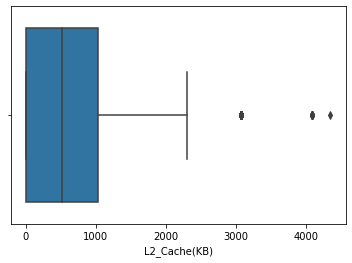

In [55]:
sns.boxplot(x=data2['L2_Cache(KB)']),

(<matplotlib.axes._subplots.AxesSubplot at 0x7fdcaf910990>,)

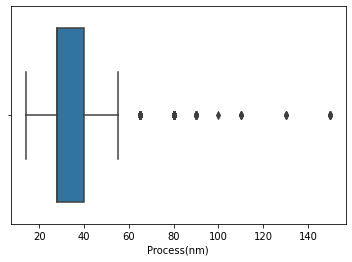

In [56]:
sns.boxplot(x=data2['Process(nm)']),

(<matplotlib.axes._subplots.AxesSubplot at 0x7fdcaf454250>,)

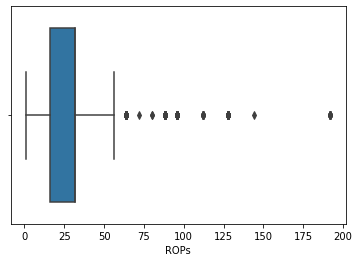

In [57]:
sns.boxplot(x=data2['ROPs']),

ROPs vamos ignorar os Outliers pois eles surgiram do ajuste dos Dados, então consideraremos normalmente estes valores

- Agora investigar melhor estes possíveis Outliers encontrados






In [58]:
data2.loc[(data2['L2_Cache(KB)']>2500),['L2_Cache(KB)','DirectX']]

,L2_Cache(KB),DirectX
5,3072.0,12
20,3072.0,12
74,3072.0,12
142,3072.0,12
153,3072.0,12
...,...,...
3053,3072.0,12
3065,4096.0,12
3076,3072.0,12
3098,3072.0,12


Esses valores não são Outliers
<p>Chache L2 pode ultrapassar os valores de 3000KB</p>
[<b>Exemplo</b>](https://www.intel.com.br/content/www/br/pt/products/sku/217182/intel-core-i711390h-processor-12m-cache-up-to-5-00-ghz-with-ipu/specifications.html)


In [59]:
data2.loc[(data2['Process(nm)']>60),['Process(nm)','DirectX']]

,Process(nm),DirectX
40,65.0,10
53,65.0,10
58,80.0,10
73,90.0,10
76,65.0,10
...,...,...
3042,80.0,10
3082,90.0,9
3097,65.0,10
3101,80.0,10


Em Rápida pesquisa vemos que o Process nm é basicamente a distância dos transistores na construção do processador e teoricamente quanto menor melhor.
<p>Como temos vários valores nesta faixa e nada que seja extremamente maior, algo que pareça inviável dentro da construção de um processador, vamos deixar como estão</p>
[texto do link](https://www.tecmundo.com.br/produto/118921-processadores-tem-cada-vez-nanometros.htm) 

# **Vamos Investigar os dados faltantes**

## Exploração inicial geral

In [60]:
print('tamanho TOTAL da amostra:',len(data2))
data2.isnull().sum().sort_values()

tamanho TOTAL da amostra: 3180


Name                           0
SLI_Crossfire                  0
Notebook_GPU                   0
L2_Cache(KB)                   0
DirectX                        0
Core_Speed(MHz)                0
Dedicated                     10
Integrated                    10
Memory_Type                   43
Memory_Bus(Bit)               47
Shader                        82
Memory_Speed(MHz)             91
Memory_Bandwidth(GB/sec)     101
Resolution_W                 150
Resolution_H                 150
Memory(MB)                   366
Process(nm)                  374
ROPs                         441
TMUs                         441
Texture_Rate(GTexel/s)       445
Pixel_Rate(GPixel/s)         445
Best_Resolution1             530
Best_Resolution2             530
Max_Power(W)                 547
Power_Connector              646
DVI_Connection               679
VGA_Connection               686
HDMI_Connection              688
PSU(W)                      1051
PSU(A)                      1364
Boost_Cloc

Vamos deixar de fora do modelo a feature DisplayPort_Connection, pois há muitos dados nulos

In [61]:
data3=data2.drop('DisplayPort_Connection',axis=1)
data3.isnull().sum().sort_values()

Name                           0
SLI_Crossfire                  0
Notebook_GPU                   0
L2_Cache(KB)                   0
DirectX                        0
Core_Speed(MHz)                0
Dedicated                     10
Integrated                    10
Memory_Type                   43
Memory_Bus(Bit)               47
Shader                        82
Memory_Speed(MHz)             91
Memory_Bandwidth(GB/sec)     101
Resolution_H                 150
Resolution_W                 150
Memory(MB)                   366
Process(nm)                  374
TMUs                         441
ROPs                         441
Texture_Rate(GTexel/s)       445
Pixel_Rate(GPixel/s)         445
Best_Resolution2             530
Best_Resolution1             530
Max_Power(W)                 547
Power_Connector              646
DVI_Connection               679
VGA_Connection               686
HDMI_Connection              688
PSU(W)                      1051
PSU(A)                      1364
Boost_Cloc

Vamos fazer um mapa de calor para verificar as relações e tentar prever os valores nulos das variáveis

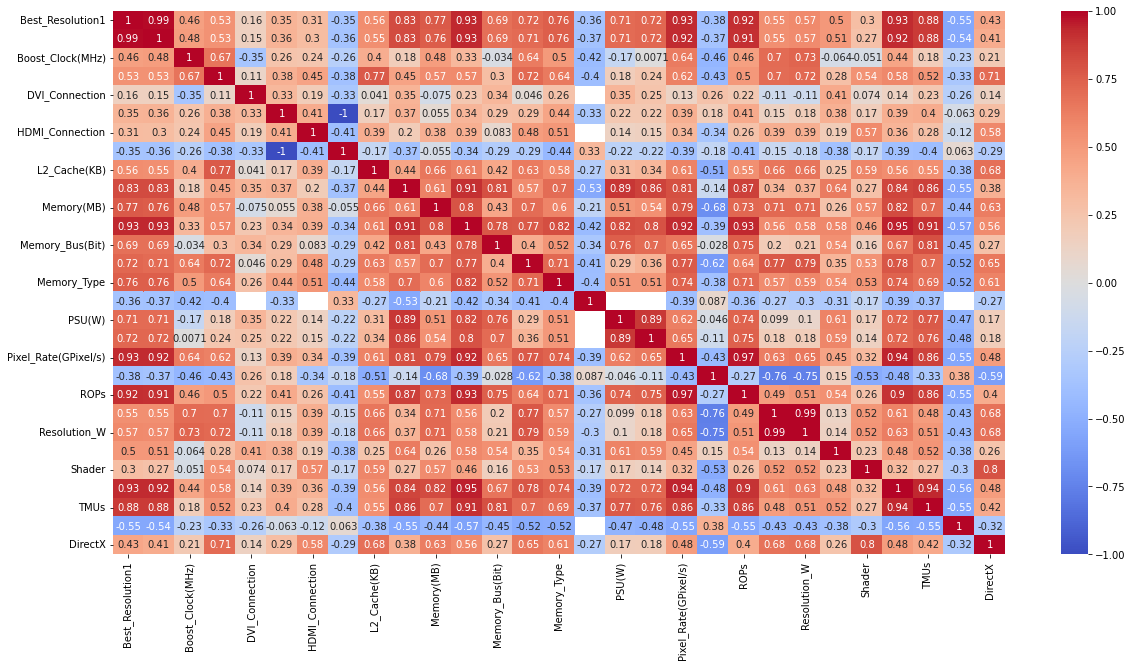

In [62]:
heatmap=sns.heatmap(data3.corr('spearman'),vmin=-1,vmax=1,annot=True,cmap='coolwarm')
heatmap.figure.set_size_inches(20, 10)

In [63]:
corr=data3.corr('spearman')
corr['DirectX'].sort_values(ascending=False) 

DirectX                     1.000000
Shader                      0.802498
Core_Speed(MHz)             0.705208
L2_Cache(KB)                0.684383
Resolution_W                0.679752
Resolution_H                0.675951
Memory_Speed(MHz)           0.649304
Memory(MB)                  0.625216
Memory_Type                 0.606223
HDMI_Connection             0.578608
Memory_Bandwidth(GB/sec)    0.563704
Pixel_Rate(GPixel/s)        0.482046
Texture_Rate(GTexel/s)      0.478664
Best_Resolution1            0.431166
TMUs                        0.416649
Best_Resolution2            0.405461
ROPs                        0.401496
Max_Power(W)                0.379073
Dedicated                   0.292350
Memory_Bus(Bit)             0.269490
SLI_Crossfire               0.256617
Boost_Clock(MHz)            0.213832
PSU(A)                      0.181122
PSU(W)                      0.173230
DVI_Connection              0.142414
Notebook_GPU               -0.273725
Integrated                 -0.292350
V

In [64]:
corr=data3.corr('spearman')
corr['Shader'].sort_values(ascending=False) 

Shader                      1.000000
DirectX                     0.802498
L2_Cache(KB)                0.592522
HDMI_Connection             0.573712
Memory(MB)                  0.568890
Core_Speed(MHz)             0.536009
Memory_Speed(MHz)           0.533177
Memory_Type                 0.527234
Resolution_W                0.519228
Resolution_H                0.515172
Memory_Bandwidth(GB/sec)    0.459133
Pixel_Rate(GPixel/s)        0.320675
Texture_Rate(GTexel/s)      0.315906
Best_Resolution1            0.295318
Best_Resolution2            0.269796
Max_Power(W)                0.269677
TMUs                        0.266458
ROPs                        0.263252
SLI_Crossfire               0.229909
Dedicated                   0.173981
PSU(W)                      0.166564
Memory_Bus(Bit)             0.163581
PSU(A)                      0.140761
DVI_Connection              0.074252
Boost_Clock(MHz)           -0.050582
Notebook_GPU               -0.173543
Integrated                 -0.173981
V

## Dedicated  e Integrated (tratando NaN)

In [81]:
set(data3.Dedicated.values)

{0.0, 1.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan}

In [82]:
corr['Dedicated'].sort_values()

Integrated                 -1.000000
Notebook_GPU               -0.334911
VGA_Connection             -0.062510
Memory(MB)                  0.055330
Resolution_H                0.145713
L2_Cache(KB)                0.166814
Shader                      0.173981
Resolution_W                0.181773
Process(nm)                 0.183269
PSU(W)                      0.219208
PSU(A)                      0.220918
Boost_Clock(MHz)            0.256723
Memory_Bus(Bit)             0.286304
DirectX                     0.292350
Memory_Speed(MHz)           0.294488
DVI_Connection              0.332971
Memory_Bandwidth(GB/sec)    0.343761
Best_Resolution1            0.354747
Best_Resolution2            0.360528
Max_Power(W)                0.371139
Core_Speed(MHz)             0.378391
SLI_Crossfire               0.378706
Texture_Rate(GTexel/s)      0.388399
Pixel_Rate(GPixel/s)        0.390051
TMUs                        0.401723
HDMI_Connection             0.405507
ROPs                        0.406790
M

Vemos que Dedicated e Integrated são conjuntos disjuntos

In [112]:
data3.loc[(data3.Dedicated==0),['Dedicated','Integrated','ROPs','Memory_Type','Pixel_Rate(GPixel/s)']]

,Dedicated,Integrated,ROPs,Memory_Type,Pixel_Rate(GPixel/s)
6,0.0,1.0,2.0,3.0,2.0
12,0.0,1.0,2.0,2.0,2.0
29,0.0,1.0,4.0,2.0,2.0
35,0.0,1.0,4.0,2.0,2.0
51,0.0,1.0,NaN,NaN,NaN
...,...,...,...,...,...
3150,0.0,1.0,1.0,2.0,1.0
3151,0.0,1.0,8.0,2.0,5.0
3160,0.0,1.0,1.0,2.0,1.0
3168,0.0,1.0,2.0,2.0,2.0


In [119]:
data3.loc[(data3.Dedicated==0)&(data3.ROPs<=16)&(data3.Memory_Type<=3)&(data3['Pixel_Rate(GPixel/s)']<=16),['Dedicated','Integrated','ROPs','Memory_Type','Pixel_Rate(GPixel/s)']]

,Dedicated,Integrated,ROPs,Memory_Type,Pixel_Rate(GPixel/s)
6,0.0,1.0,2.0,3.0,2.0
12,0.0,1.0,2.0,2.0,2.0
29,0.0,1.0,4.0,2.0,2.0
35,0.0,1.0,4.0,2.0,2.0
55,0.0,1.0,2.0,2.0,2.0
...,...,...,...,...,...
3150,0.0,1.0,1.0,2.0,1.0
3151,0.0,1.0,8.0,2.0,5.0
3160,0.0,1.0,1.0,2.0,1.0
3168,0.0,1.0,2.0,2.0,2.0


In [120]:
data3.loc[(data3.Dedicated==1)&(data3.ROPs<=16)&(data3.Memory_Type<=3)&(data3['Pixel_Rate(GPixel/s)']<=16),['Dedicated','Integrated','ROPs','Memory_Type','Pixel_Rate(GPixel/s)']]

,Dedicated,Integrated,ROPs,Memory_Type,Pixel_Rate(GPixel/s)
2,1.0,0.0,16.0,2.0,13.0
4,1.0,0.0,8.0,2.0,8.0
19,1.0,0.0,16.0,2.0,10.0
38,1.0,0.0,4.0,1.0,2.0
42,1.0,0.0,8.0,2.0,9.0
...,...,...,...,...,...
3134,1.0,0.0,8.0,2.0,5.0
3139,1.0,0.0,4.0,1.0,2.0
3154,1.0,0.0,16.0,2.0,13.0
3161,1.0,0.0,4.0,2.0,3.0


Vemos que apenas aproximadamente 10% das GPU's tem memoria integrada. 
Vemos que todas as integradas tem ROPs menor igual a 16. Logo todas GPUs com ROPs maior que 16 serão Dedicada =1 e Integrated = 0.
<p>Outro ponto é que apenas 5 GPUs de Memoria Integrada tem Memory Type maior que 3.</p>
<p>Pixel maior que 24 é Dedicada.


Com base nas breves análises acima, conseguimos inferir na tabela abaixo que:
index 788 é integrada.
index 1403 não definido.
Demais index Dedicado

In [115]:
data3.loc[(data3.Dedicated.isnull()==True),['Dedicated','Integrated','ROPs','Memory_Type','Pixel_Rate(GPixel/s)']]

,Dedicated,Integrated,ROPs,Memory_Type,Pixel_Rate(GPixel/s)
788,NaN,NaN,3.0,NaN,1.0
1238,NaN,NaN,16.0,NaN,19.0
1273,NaN,NaN,64.0,10.0,67.0
1355,NaN,NaN,128.0,NaN,128.0
1403,NaN,NaN,NaN,NaN,NaN
1947,NaN,NaN,NaN,5.0,NaN
2036,NaN,NaN,32.0,7.0,39.0
2292,NaN,NaN,96.0,8.0,147.0
2732,NaN,NaN,48.0,7.0,83.0
3065,NaN,NaN,128.0,NaN,166.0


Set valores para substituir os dados faltantes

In [121]:
value=[[0,1],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0]]
value

[[0, 1],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0]]

In [122]:
data3.loc[(data3.Dedicated.isnull()==True),['Dedicated','Integrated']]=value
data3[['Dedicated','Integrated']].isnull().sum()

Dedicated     0
Integrated    0
dtype: int64

##Memory_Bus(Bit) Tratando NaN

In [133]:
data3['Memory_Bus(Bit)'].isnull().sum()

0

In [ ]:
corr['Memory_Bus(Bit)'].sort_values(ascending=False)

Memory_Bus(Bit)             1.000000
TMUs                        0.812037
Max_Power(W)                0.811306
Memory_Bandwidth(GB/sec)    0.776371
PSU(W)                      0.757382
ROPs                        0.751339
PSU(A)                      0.704560
Best_Resolution2            0.687379
Best_Resolution1            0.687264
Texture_Rate(GTexel/s)      0.665531
Pixel_Rate(GPixel/s)        0.650543
SLI_Crossfire               0.539379
Memory_Type                 0.517350
Memory(MB)                  0.433861
L2_Cache(KB)                0.424727
Memory_Speed(MHz)           0.396351
DVI_Connection              0.339136
Core_Speed(MHz)             0.296142
Dedicated                   0.286304
DirectX                     0.269490
Resolution_W                0.212274
Resolution_H                0.201542
Shader                      0.163581
HDMI_Connection             0.083314
Process(nm)                -0.028028
Boost_Clock(MHz)           -0.034354
Integrated                 -0.286304
N

In [131]:
data3['Memory_Bus(Bit)'].mode()[0]

128.0

In [132]:
data3.loc[(data3['Memory_Bus(Bit)'].isnull()==True),['Memory_Bus(Bit)']]=data3['Memory_Bus(Bit)'].mode()[0]
data3['Memory_Bus(Bit)'].isnull().sum()

0

## Memory Type tratando NaN


In [134]:
data3.loc[(data3['Memory_Type'].isnull()==True),['Memory_Type']]
print('dados nulos:',data3['Memory_Type'].isnull().sum())
print('moda Memory Type:',data3.Memory_Type.mode()[0])

dados nulos: 43
moda Memory Type: 7.0


In [135]:
data3.loc[(data3['Memory_Type'].isnull()==True),['Memory_Type']]=7.0
print('dados nulos:',data3['Memory_Type'].isnull().sum())

dados nulos: 0


## Memory_Speed(MHz)

In [136]:
data3.isnull().sum().sort_values()

Name                           0
SLI_Crossfire                  0
Notebook_GPU                   0
Memory_Bus(Bit)                0
L2_Cache(KB)                   0
Integrated                     0
Memory_Type                    0
DirectX                        0
Dedicated                      0
Core_Speed(MHz)                0
Shader                        82
Memory_Speed(MHz)             91
Memory_Bandwidth(GB/sec)     101
Resolution_H                 150
Resolution_W                 150
Memory(MB)                   366
Process(nm)                  374
TMUs                         441
ROPs                         441
Texture_Rate(GTexel/s)       445
Pixel_Rate(GPixel/s)         445
Best_Resolution1             530
Best_Resolution2             530
Max_Power(W)                 547
Power_Connector              646
DVI_Connection               679
VGA_Connection               686
HDMI_Connection              688
PSU(W)                      1051
PSU(A)                      1364
Boost_Cloc

In [137]:
print(data3['Memory_Speed(MHz)'].describe())
print('\nMODA:',data3['Memory_Speed(MHz)'].mode()[0])

count    3089.000000
mean     1198.651020
std       438.041301
min       110.000000
25%       900.000000
50%      1200.000000
75%      1502.000000
max      2127.000000
Name: Memory_Speed(MHz), dtype: float64

MODA: 800.0


In [138]:
data3.loc[(data3['Memory_Speed(MHz)']==800),['Memory_Speed(MHz)']]

,Memory_Speed(MHz)
1,800.0
12,800.0
19,800.0
27,800.0
29,800.0
...,...
3151,800.0
3160,800.0
3166,800.0
3168,800.0


In [139]:
data3.loc[(data3['Memory_Speed(MHz)'].isnull()==True),['Memory_Speed(MHz)']]=800
data3.isnull().sum().sort_values()

Name                           0
SLI_Crossfire                  0
Notebook_GPU                   0
Memory_Speed(MHz)              0
Memory_Bus(Bit)                0
L2_Cache(KB)                   0
Integrated                     0
Memory_Type                    0
Dedicated                      0
Core_Speed(MHz)                0
DirectX                        0
Shader                        82
Memory_Bandwidth(GB/sec)     101
Resolution_W                 150
Resolution_H                 150
Memory(MB)                   366
Process(nm)                  374
TMUs                         441
ROPs                         441
Texture_Rate(GTexel/s)       445
Pixel_Rate(GPixel/s)         445
Best_Resolution2             530
Best_Resolution1             530
Max_Power(W)                 547
Power_Connector              646
DVI_Connection               679
VGA_Connection               686
HDMI_Connection              688
PSU(W)                      1051
PSU(A)                      1364
Boost_Cloc

##  Shader Previsão
Usaremos Core_Speed, L2_Cache e Memory_Type para prever


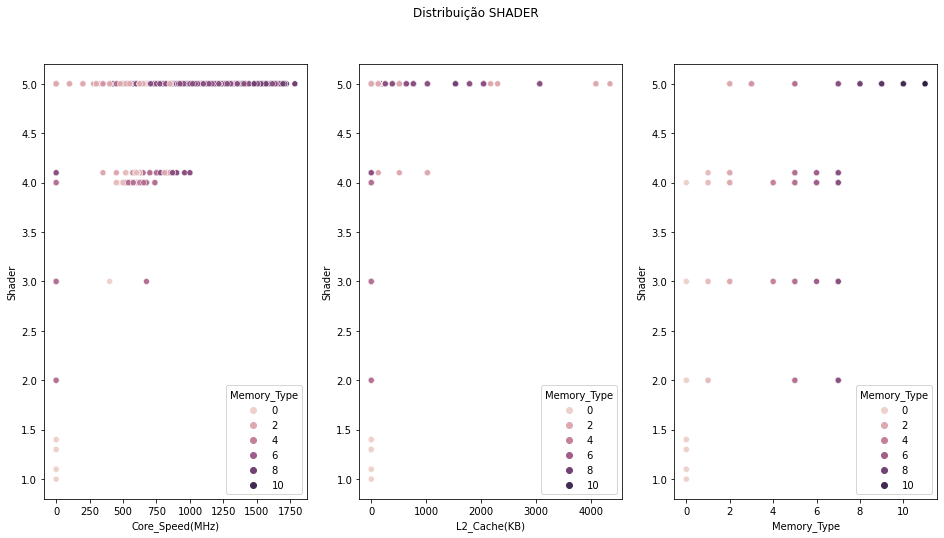

In [140]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(16, 8), sharey=False)
fig.suptitle('Distribuição SHADER')

sns.scatterplot(ax=axes[0],x=data3['Core_Speed(MHz)'],y=data3.Shader,hue=data3.Memory_Type)


sns.scatterplot(ax=axes[1],x=data3['L2_Cache(KB)'],y=data3.Shader,hue=data3.Memory_Type)

sns.scatterplot(ax=axes[2],x=data3['Memory_Type'],y=data3.Shader,hue=data3.Memory_Type)


In [141]:
#Selecionando Indice dos dados faltantes do Shader
df_shader_for_pred=data3.loc[(data3.Shader.isnull()),['Memory_Type','Core_Speed(MHz)','L2_Cache(KB)']]
df_shader_for_pred.index

Int64Index([  47,   61,   81,   96,  117,  170,  212,  232,  250,  281,  293,
             302,  729,  743,  788,  790,  820,  862,  891,  930,  997, 1041,
            1062, 1077, 1100, 1104, 1238, 1280, 1296, 1312, 1355, 1362, 1371,
            1389, 1403, 1466, 1493, 1565, 1662, 1717, 1752, 1773, 1811, 1818,
            1820, 1864, 1871, 1889, 1968, 1990, 2006, 2033, 2034, 2049, 2067,
            2152, 2194, 2281, 2392, 2417, 2464, 2466, 2518, 2544, 2596, 2607,
            2695, 2707, 2732, 2763, 2830, 2847, 2894, 2899, 2906, 2915, 3039,
            3056, 3065, 3081, 3118, 3170],
           dtype='int64')

Vamos usar Arvore de Decisão para prever os NaN da Shader

A aplicação do modelo será nos no conjunto de dados cujos indices correspondem ao Share == NaN</p>
<p>O Treino do Modelo: Retirar os indices que Shader é Nan e fazer um split com train size 0.7 nas Core Speed e L2_Cache e Memory_Type</p>
<p>Verificar métricas

In [143]:
#Data sem faltantes na Shader
df_shader=data3[['L2_Cache(KB)','Core_Speed(MHz)','Shader','Memory_Type']].drop(index=df_shader_for_pred.index, axis=0)
df_shader

,L2_Cache(KB),Core_Speed(MHz),Shader,Memory_Type
0,1024.0,1076.0,5.0,7.0
1,0.0,0.0,4.0,5.0
2,256.0,810.0,5.0,2.0
3,384.0,1046.0,5.0,7.0
4,128.0,954.0,5.0,2.0
...,...,...,...,...
3175,512.0,300.0,5.0,2.0
3176,256.0,775.0,5.0,7.0
3177,512.0,820.0,5.0,7.0
3178,512.0,850.0,5.0,2.0


In [144]:
#definindo X e target
X=df_shader[['Memory_Type','Core_Speed(MHz)','L2_Cache(KB)']]
y=df_shader.Shader

In [146]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import train_test_split

#separação Treino Teste
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=0, test_size=0.3)

#Definindo os parâmetros que queremos variar/queremos otimizar
params = {
    'criterion': ['mse','mae', 'poisson'],
    'max_depth': [3, 5, 8, 15,23],
    'min_samples_split':np.arange(2,10,2),
    'min_samples_leaf':np.arange(2,10,2),
}

#rodando o modelo com os vários parâmetros, 
#cv = 5 é o número de "folds" utilizados, 
#verbose =  para plotar informações na tela

gs = GridSearchCV(DecisionTreeRegressor(), params, cv = 5, verbose=0)
gs.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: 

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'mae', 'poisson'],
                         'max_depth': [3, 5, 8, 15, 23],
                         'min_samples_leaf': array([2, 4, 6, 8]),
                         'min_samples_split': array([2, 4, 6, 8])})

In [147]:
#Verificando os melhores hiperparametros
gs.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=15, min_samples_leaf=2,
                      min_samples_split=8)

In [148]:
#Treinando o modelo e validando o modelo
from sklearn.metrics import r2_score
gs.best_estimator_.fit(X_train,y_train)
pred_test = gs.best_estimator_.predict(X_test)
pred_train = gs.best_estimator_.predict(X_train)
print('Score no teste: ', r2_score(y_test,pred_test))
print('Score no treino: ', r2_score(y_train,pred_train))

Score no teste:  0.8045508556513455
Score no treino:  0.768438912731225


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


In [149]:
#Aplicação do modelo
shader_pred=gs.best_estimator_.predict(df_shader_for_pred)

In [150]:
#Ajustando predição para Series
shader_pred=shader_pred.astype(int)
shared_pred=pd.Series(shader_pred, index=df_shader_for_pred.index)
shared_pred


47      5
61      2
81      5
96      5
117     2
       ..
3056    5
3065    5
3081    2
3118    5
3170    5
Length: 82, dtype: int64

In [151]:
#Substituindo os valores NaN do data3 com os valores preditos
data3.loc[(data3.Shader.isnull()==True),['Shader']]=shared_pred
#Verificando
data3.Shader[df_shader_for_pred.index]

47      5.0
61      2.0
81      5.0
96      5.0
117     2.0
       ... 
3056    5.0
3065    5.0
3081    2.0
3118    5.0
3170    5.0
Name: Shader, Length: 82, dtype: float64

In [152]:
data3.isnull().sum().sort_values()

Name                           0
Shader                         0
SLI_Crossfire                  0
Notebook_GPU                   0
Memory_Speed(MHz)              0
Memory_Bus(Bit)                0
L2_Cache(KB)                   0
Integrated                     0
Memory_Type                    0
Dedicated                      0
Core_Speed(MHz)                0
DirectX                        0
Memory_Bandwidth(GB/sec)     101
Resolution_W                 150
Resolution_H                 150
Memory(MB)                   366
Process(nm)                  374
ROPs                         441
TMUs                         441
Texture_Rate(GTexel/s)       445
Pixel_Rate(GPixel/s)         445
Best_Resolution2             530
Best_Resolution1             530
Max_Power(W)                 547
Power_Connector              646
DVI_Connection               679
VGA_Connection               686
HDMI_Connection              688
PSU(W)                      1051
PSU(A)                      1364
Boost_Cloc

## Memory_Bandwidth(GB/sec)

In [153]:
print(data3['Memory_Bandwidth(GB/sec)'].describe())
print('\nMODA:',data3['Memory_Bandwidth(GB/sec)'].mode()[0])

count    3079.000000
mean      141.138974
std       135.564450
min         1.000000
25%        28.800000
50%       112.000000
75%       201.900000
max      1280.000000
Name: Memory_Bandwidth(GB/sec), dtype: float64

MODA: 25.6


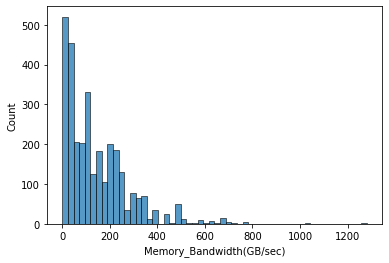

In [154]:
sns.histplot(data3['Memory_Bandwidth(GB/sec)'])

In [155]:
data3.loc[(data3['Memory_Bandwidth(GB/sec)']==112),['Memory_Bandwidth(GB/sec)']]

,Memory_Bandwidth(GB/sec)
81,112.0
96,112.0
170,112.0
281,112.0
462,112.0
578,112.0
758,112.0
773,112.0
790,112.0
820,112.0


In [156]:
data3.loc[(data3['Memory_Bandwidth(GB/sec)'].isnull()==True),['Memory_Bandwidth(GB/sec)']]=112
data3.isnull().sum().sort_values()

Name                           0
Shader                         0
SLI_Crossfire                  0
Notebook_GPU                   0
Memory_Speed(MHz)              0
Memory_Bus(Bit)                0
Memory_Bandwidth(GB/sec)       0
L2_Cache(KB)                   0
Memory_Type                    0
DirectX                        0
Dedicated                      0
Core_Speed(MHz)                0
Integrated                     0
Resolution_W                 150
Resolution_H                 150
Memory(MB)                   366
Process(nm)                  374
TMUs                         441
ROPs                         441
Texture_Rate(GTexel/s)       445
Pixel_Rate(GPixel/s)         445
Best_Resolution2             530
Best_Resolution1             530
Max_Power(W)                 547
Power_Connector              646
DVI_Connection               679
VGA_Connection               686
HDMI_Connection              688
PSU(W)                      1051
PSU(A)                      1364
Boost_Cloc

## Resolution_W e Resolution_H

In [157]:
print('Resolution_W:',data3.Resolution_W.mode()[0])
print('\nResolution_H:',data3.Resolution_H.mode()[0])

Resolution_W: 4096.0

Resolution_H: 2160.0


In [158]:
data3.loc[(data3.Resolution_W.isnull()==True),['Resolution_W']]=data3.Resolution_W.mode()[0]
data3.loc[(data3.Resolution_H.isnull()==True),['Resolution_H']]=data3.Resolution_H.mode()[0]
data3.isnull().sum().sort_values()

Name                           0
Shader                         0
SLI_Crossfire                  0
Resolution_W                   0
Resolution_H                   0
Notebook_GPU                   0
Memory_Speed(MHz)              0
Memory_Bus(Bit)                0
Memory_Bandwidth(GB/sec)       0
Memory_Type                    0
DirectX                        0
Integrated                     0
Dedicated                      0
Core_Speed(MHz)                0
L2_Cache(KB)                   0
Memory(MB)                   366
Process(nm)                  374
TMUs                         441
ROPs                         441
Texture_Rate(GTexel/s)       445
Pixel_Rate(GPixel/s)         445
Best_Resolution1             530
Best_Resolution2             530
Max_Power(W)                 547
Power_Connector              646
DVI_Connection               679
VGA_Connection               686
HDMI_Connection              688
PSU(W)                      1051
PSU(A)                      1364
Boost_Cloc

# Criando e Treinando o Modelo (Redes Neurais)

In [159]:
print(data3.isnull().sum().sort_values())
print(data3.isnull().sum().sort_values().index)


Name                           0
Shader                         0
SLI_Crossfire                  0
Resolution_W                   0
Resolution_H                   0
Notebook_GPU                   0
Memory_Speed(MHz)              0
Memory_Bus(Bit)                0
Memory_Bandwidth(GB/sec)       0
Memory_Type                    0
DirectX                        0
Integrated                     0
Dedicated                      0
Core_Speed(MHz)                0
L2_Cache(KB)                   0
Memory(MB)                   366
Process(nm)                  374
TMUs                         441
ROPs                         441
Texture_Rate(GTexel/s)       445
Pixel_Rate(GPixel/s)         445
Best_Resolution1             530
Best_Resolution2             530
Max_Power(W)                 547
Power_Connector              646
DVI_Connection               679
VGA_Connection               686
HDMI_Connection              688
PSU(W)                      1051
PSU(A)                      1364
Boost_Cloc

In [160]:
#Selecionando as colunas que irão para o modelo
colunasX=[ 'Shader', 'SLI_Crossfire', 'Resolution_W', 'Resolution_H',
       'Notebook_GPU', 'Memory_Speed(MHz)', 'Memory_Bus(Bit)',
       'Memory_Bandwidth(GB/sec)', 'Memory_Type', 'Integrated',
       'Dedicated', 'Core_Speed(MHz)', 'L2_Cache(KB)']

In [161]:
data3[colunasX]

,Shader,SLI_Crossfire,Resolution_W,Resolution_H,Notebook_GPU,Memory_Speed(MHz),Memory_Bus(Bit),Memory_Bandwidth(GB/sec),Memory_Type,Integrated,Dedicated,Core_Speed(MHz),L2_Cache(KB)
0,5.0,1.0,5120.0,3200.0,0.0,1653.0,128.0,105.8,7.0,0.0,1.0,1076.0,1024.0
1,4.0,0.0,2560.0,1600.0,1.0,800.0,128.0,25.6,5.0,0.0,1.0,0.0,0.0
2,5.0,0.0,4096.0,2160.0,1.0,900.0,128.0,28.8,2.0,0.0,1.0,810.0,256.0
3,5.0,1.0,4096.0,2160.0,0.0,1502.0,192.0,144.2,7.0,0.0,1.0,1046.0,384.0
4,5.0,0.0,4096.0,2160.0,1.0,900.0,64.0,14.4,2.0,0.0,1.0,954.0,128.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3175,5.0,0.0,4096.0,2304.0,1.0,933.0,128.0,29.9,2.0,1.0,0.0,300.0,512.0
3176,5.0,1.0,2560.0,1600.0,0.0,1000.0,128.0,64.0,7.0,0.0,1.0,775.0,256.0
3177,5.0,1.0,2560.0,1600.0,0.0,1100.0,256.0,140.8,7.0,0.0,1.0,820.0,512.0
3178,5.0,1.0,4096.0,2160.0,0.0,800.0,128.0,25.6,2.0,0.0,1.0,850.0,512.0


In [162]:
#Vamos normalizar os dados
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(data3[colunasX])
minmax_df = pd.DataFrame(minmax_df, columns =[colunasX])
minmax_df

,Shader,SLI_Crossfire,Resolution_W,Resolution_H,Notebook_GPU,Memory_Speed(MHz),Memory_Bus(Bit),Memory_Bandwidth(GB/sec),Memory_Type,Integrated,Dedicated,Core_Speed(MHz),L2_Cache(KB)
0,1.00,1.0,0.60,0.672515,0.0,0.764998,0.011765,0.081939,0.636364,0.0,1.0,0.603139,0.235294
1,0.75,0.0,0.20,0.204678,1.0,0.342092,0.011765,0.019234,0.454545,0.0,1.0,0.000000,0.000000
2,1.00,0.0,0.44,0.368421,1.0,0.391671,0.011765,0.021736,0.181818,0.0,1.0,0.454036,0.058824
3,1.00,1.0,0.44,0.368421,0.0,0.690134,0.019608,0.111962,0.636364,0.0,1.0,0.586323,0.088235
4,1.00,0.0,0.44,0.368421,1.0,0.391671,0.003922,0.010477,0.181818,0.0,1.0,0.534753,0.029412
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3175,1.00,0.0,0.44,0.410526,1.0,0.408032,0.011765,0.022596,0.181818,1.0,0.0,0.168161,0.117647
3176,1.00,1.0,0.20,0.204678,0.0,0.441249,0.011765,0.049257,0.636364,0.0,1.0,0.434417,0.058824
3177,1.00,1.0,0.20,0.204678,0.0,0.490828,0.027451,0.109304,0.636364,0.0,1.0,0.459641,0.117647
3178,1.00,1.0,0.44,0.368421,0.0,0.342092,0.011765,0.019234,0.181818,0.0,1.0,0.476457,0.117647


In [163]:
from keras import layers
from keras import models

In [164]:
#Instanciando e estuturando o modelo
model = models.Sequential()
model.add(layers.Dense(130, activation='relu',input_shape=(13,)))
model.add(layers.Dense(260, activation='relu'))
model.add(layers.Dense(1300, activation='relu'))
model.add(layers.Dense(260, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [165]:
#encoding do target de 0 a 4
target=data3.DirectX.apply(lambda x: x % 8)
target

0       4
1       2
2       4
3       4
4       4
       ..
3175    4
3176    3
3177    3
3178    4
3179    4
Name: DirectX, Length: 3180, dtype: int64

In [166]:
#Split Treino-Teste
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(minmax_df,target, random_state=0, test_size=0.3)

In [167]:
#One hot encoding do target
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [168]:
X_train.shape

(2226, 13)

In [169]:
y_train.shape

(2226, 5)

In [170]:
#Trainando o modelo
model.fit(X_train, y_train, epochs=300, batch_size=512)

Epoch 1/300
5/5 [==============================] - 1s 47ms/step - loss: 1.1624 - accuracy: 0.5458
Epoch 2/300
5/5 [==============================] - 0s 41ms/step - loss: 0.6964 - accuracy: 0.7062
Epoch 3/300
5/5 [==============================] - 0s 42ms/step - loss: 0.6754 - accuracy: 0.7565
Epoch 4/300
5/5 [==============================] - 0s 44ms/step - loss: 0.5731 - accuracy: 0.7597
Epoch 5/300
5/5 [==============================] - 0s 45ms/step - loss: 0.4930 - accuracy: 0.8176
Epoch 6/300
5/5 [==============================] - 0s 43ms/step - loss: 0.4985 - accuracy: 0.7929
Epoch 7/300
5/5 [==============================] - 0s 43ms/step - loss: 0.4288 - accuracy: 0.8252
Epoch 8/300
5/5 [==============================] - 0s 43ms/step - loss: 0.4696 - accuracy: 0.8118
Epoch 9/300
5/5 [==============================] - 0s 47ms/step - loss: 0.3134 - accuracy: 0.8778
Epoch 10/300
5/5 [==============================] - 0s 43ms/step - loss: 0.4295 - accuracy: 0.8037
Epoch 11/300
5/5 [=

In [171]:
model.evaluate(X_test, y_test)

30/30 [==============================] - 0s 4ms/step - loss: 0.2142 - accuracy: 0.9434


[0.2141791731119156, 0.9433962106704712]

In [172]:
#Realizando a Inferência com o Modelo Trainado
y_pred = model.predict(X_test)
print(y_pred)

30/30 [==============================] - 0s 4ms/step
[[1.1541224e-06 9.9932915e-01 6.6957518e-04 1.2308753e-08 2.9579722e-14]
 [1.0816764e-07 4.9161480e-07 4.7155144e-04 8.4876311e-01 1.5076473e-01]
 [0.0000000e+00 1.5652288e-38 1.9408605e-23 8.6911238e-18 9.9999994e-01]
 ...
 [0.0000000e+00 0.0000000e+00 1.6142386e-36 2.3327448e-23 9.9999994e-01]
 [4.3431923e-36 3.1817441e-36 1.8019319e-23 9.1613754e-15 1.0000000e+00]
 [0.0000000e+00 0.0000000e+00 2.5884578e-28 6.0880607e-19 1.0000000e+00]]


In [173]:
y_pred_onehot = y_pred.argmax(axis=1)
y_pred_onehot = to_categorical(y_pred_onehot)
print('Classes reais:\n', y_test)
print('\nClasses preditas:\n', y_pred_onehot)

Classes reais:
 [[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]

Classes preditas:
 [[0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [174]:
#Avaliando o Modelo
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_onehot))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       0.90      0.93      0.92        41
           2       0.97      0.97      0.97       116
           3       0.80      0.89      0.85       141
           4       0.98      0.95      0.96       647

   micro avg       0.94      0.94      0.94       954
   macro avg       0.93      0.88      0.90       954
weighted avg       0.95      0.94      0.94       954
 samples avg       0.94      0.94      0.94       954



# Aplicação do Modelo

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CIDAMO/Unidade IV/4-desafio-cidamo-2022/Test.csv')

## Preparar os dados para entrar no Modelo

In [ ]:
colunasX #Verificando as colunas para o Modelo

['Shader',
 'SLI_Crossfire',
 'Resolution_W',
 'Resolution_H',
 'Notebook_GPU',
 'Memory_Speed(MHz)',
 'Memory_Bus(Bit)',
 'Memory_Bandwidth(GB/sec)',
 'Memory_Type',
 'Integrated',
 'Dedicated',
 'Core_Speed(MHz)',
 'L2_Cache(KB)']

### L2_Cache

In [ ]:
#Preparando L2_Cache
L2_Cache=df['L2_Cache'].str.split('K',expand=True)
L2_Cache.drop(labels=[1],axis=1,inplace=True)
L2_Cache.rename(columns={0:'L2_Cache'},inplace=True)
df.L2_Cache.loc[:]=L2_Cache.squeeze()
df.rename({'L2_Cache':'L2_Cache(KB)'},axis=1,inplace=True)
df['L2_Cache(KB)']=df['L2_Cache(KB)'].astype('float')
df.info(verbose=True )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Nome                    220 non-null    object 
 1   Best_Resolution         113 non-null    object 
 2   Boost_Clock             34 non-null     object 
 3   Core_Speed(MHz)         220 non-null    float64
 4   DVI_Connection          152 non-null    float64
 5   Dedicated               216 non-null    object 
 6   DisplayPort_Connection  21 non-null     float64
 7   HDMI_Connection         148 non-null    float64
 8   Integrated              216 non-null    object 
 9   L2_Cache(KB)            220 non-null    float64
 10  Max_Power               147 non-null    object 
 11  Memory                  171 non-null    object 
 12  Memory_Bandwidth        205 non-null    object 
 13  Memory_Bus              210 non-null    object 
 14  Memory_Speed            209 non-null    ob

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


### Core_Speed

In [ ]:
#Preparando Core_Speed da df
core_speed=df['Core_Speed'].str.split(' ',expand=True)
core_speed.drop(labels=[1],axis=1,inplace=True)
core_speed.rename(columns={0:'Core_Speed'},inplace=True)
core_speed
df.Core_Speed.loc[:]=core_speed.squeeze()
df.Core_Speed
df.rename({'Core_Speed':'Core_Speed(MHz)'},axis=1,inplace=True)
df.loc[(df['Core_Speed(MHz)']=='\n'),['Core_Speed(MHz)']]='0'
df.loc[(df['Core_Speed(MHz)']=='\n-'),['Core_Speed(MHz)']]='0'
df['Core_Speed(MHz)']=df['Core_Speed(MHz)'].astype('float')
df.info(verbose=True )

KeyError: ignored

### Memory Type

In [ ]:
df.loc[(df['Memory_Type'].isnull()==True),['Memory_Type']]
print('dados nulos:',df['Memory_Type'].isnull().sum())
print('moda Memory Type:',df.Memory_Type.mode()[0])

dados nulos: 9
moda Memory Type: GDDR5


In [ ]:
df.loc[(df['Memory_Type'].isnull()==True),['Memory_Type']]=df.Memory_Type.mode()[0]
print('dados nulos:',df['Memory_Type'].isnull().sum())

dados nulos: 0


In [ ]:
#Preparando Memory Type
from numpy import array
from sklearn.preprocessing import LabelEncoder
# define example
values = np.array(df.Memory_Type)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
df.drop('Memory_Type',axis=1,inplace=True)
df.insert(16,'Memory_Type',integer_encoded)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Nome                    220 non-null    object 
 1   Best_Resolution         113 non-null    object 
 2   Boost_Clock             34 non-null     object 
 3   Core_Speed(MHz)         220 non-null    float64
 4   DVI_Connection          152 non-null    float64
 5   Dedicated               216 non-null    object 
 6   DisplayPort_Connection  21 non-null     float64
 7   HDMI_Connection         148 non-null    float64
 8   Integrated              216 non-null    object 
 9   L2_Cache(KB)            220 non-null    float64
 10  Max_Power               147 non-null    object 
 11  Memory                  171 non-null    object 
 12  Memory_Bandwidth        205 non-null    object 
 13  Memory_Bus              210 non-null    object 
 14  Memory_Speed            209 non-null    ob

### Notebook GPU

In [ ]:
#Preparando Notebooke GPU
df.loc[(df.Notebook_GPU=='Yes'),['Notebook_GPU']]=1
df.loc[(df.Notebook_GPU=='No'),['Notebook_GPU']]=0
df['Notebook_GPU']=df['Notebook_GPU'].astype('float')
df.info(verbose=True )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Nome                    220 non-null    object 
 1   Best_Resolution         113 non-null    object 
 2   Boost_Clock             34 non-null     object 
 3   Core_Speed(MHz)         220 non-null    float64
 4   DVI_Connection          152 non-null    float64
 5   Dedicated               216 non-null    object 
 6   DisplayPort_Connection  21 non-null     float64
 7   HDMI_Connection         148 non-null    float64
 8   Integrated              216 non-null    object 
 9   L2_Cache(KB)            220 non-null    float64
 10  Max_Power               147 non-null    object 
 11  Memory                  171 non-null    object 
 12  Memory_Bandwidth        205 non-null    object 
 13  Memory_Bus              210 non-null    object 
 14  Memory_Speed            209 non-null    ob

### SLI Crossfire

In [ ]:
#Preparando SLI Crossfire
df.loc[(df.SLI_Crossfire=='Yes'),['SLI_Crossfire']]=1
df.loc[(df.SLI_Crossfire=='No'),['SLI_Crossfire']]=0
df.SLI_Crossfire=df.SLI_Crossfire.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Nome                    220 non-null    object 
 1   Best_Resolution         113 non-null    object 
 2   Boost_Clock             34 non-null     object 
 3   Core_Speed(MHz)         220 non-null    float64
 4   DVI_Connection          152 non-null    float64
 5   Dedicated               216 non-null    object 
 6   DisplayPort_Connection  21 non-null     float64
 7   HDMI_Connection         148 non-null    float64
 8   Integrated              216 non-null    object 
 9   L2_Cache(KB)            220 non-null    float64
 10  Max_Power               147 non-null    object 
 11  Memory                  171 non-null    object 
 12  Memory_Bandwidth        205 non-null    object 
 13  Memory_Bus              210 non-null    object 
 14  Memory_Speed            209 non-null    ob

## Dedicated  e Integrated (tratando NaN)

In [ ]:
df.Dedicated

0      Yes
1      Yes
2      Yes
3      Yes
4      Yes
      ... 
215     No
216    Yes
217     No
218    Yes
219     No
Name: Dedicated, Length: 220, dtype: object

In [ ]:
df.loc[(df.Dedicated=='Yes'),['Dedicated']]=1
df.loc[(df.Dedicated=='No'),['Dedicated']]=0
df['Dedicated']=df['Dedicated'].astype('float')
df.info(verbose=True )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Nome                    220 non-null    object 
 1   Best_Resolution         113 non-null    object 
 2   Boost_Clock             34 non-null     object 
 3   Core_Speed(MHz)         220 non-null    float64
 4   DVI_Connection          152 non-null    float64
 5   Dedicated               216 non-null    float64
 6   DisplayPort_Connection  21 non-null     float64
 7   HDMI_Connection         148 non-null    float64
 8   Integrated              216 non-null    object 
 9   L2_Cache(KB)            220 non-null    float64
 10  Max_Power               147 non-null    object 
 11  Memory                  171 non-null    object 
 12  Memory_Bandwidth        205 non-null    object 
 13  Memory_Bus              210 non-null    object 
 14  Memory_Speed            209 non-null    ob

In [ ]:
df.loc[(df.Integrated=='Yes'),['Integrated']]=1
df.loc[(df.Integrated=='No'),['Integrated']]=0
df['Integrated']=df['Integrated'].astype('float')
df.info(verbose=True )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Nome                    220 non-null    object 
 1   Best_Resolution         113 non-null    object 
 2   Boost_Clock             34 non-null     object 
 3   Core_Speed(MHz)         220 non-null    float64
 4   DVI_Connection          152 non-null    float64
 5   Dedicated               216 non-null    float64
 6   DisplayPort_Connection  21 non-null     float64
 7   HDMI_Connection         148 non-null    float64
 8   Integrated              216 non-null    float64
 9   L2_Cache(KB)            220 non-null    float64
 10  Max_Power               147 non-null    object 
 11  Memory                  171 non-null    object 
 12  Memory_Bandwidth        205 non-null    object 
 13  Memory_Bus              210 non-null    object 
 14  Memory_Speed            209 non-null    ob

In [ ]:
corr['Dedicated'].sort_values()

Integrated                 -1.000000
Notebook_GPU               -0.334911
VGA_Connection             -0.062510
Memory(MB)                  0.055330
Resolution_H                0.145713
L2_Cache(KB)                0.166814
Shader                      0.173981
Resolution_W                0.181773
Process(nm)                 0.183269
PSU(W)                      0.219208
PSU(A)                      0.220918
Boost_Clock(MHz)            0.256723
Memory_Bus(Bit)             0.286304
DirectX                     0.292350
Memory_Speed(MHz)           0.294488
DVI_Connection              0.332971
Memory_Bandwidth(GB/sec)    0.343761
Best_Resolution1            0.354747
Best_Resolution2            0.360528
Max_Power(W)                0.371139
Core_Speed(MHz)             0.378391
SLI_Crossfire               0.378706
Texture_Rate(GTexel/s)      0.388399
Pixel_Rate(GPixel/s)        0.390051
TMUs                        0.401723
HDMI_Connection             0.405507
ROPs                        0.406790
M

Vemos que Dedicated e Integrated são conjuntos exclusivos

In [ ]:
df.loc[(df.Dedicated.isnull()==True),['Dedicated','Integrated']]

,Dedicated,Integrated
42,NaN,NaN
141,NaN,NaN
166,NaN,NaN
184,NaN,NaN


In [ ]:
value=[[1,0],[0,1],[1,0],[0,1]]
value

[[1, 0], [0, 1], [1, 0], [0, 1]]

In [ ]:
df.loc[(df.Dedicated.isnull()==True),['Dedicated','Integrated']]=value
df[['Dedicated','Integrated']].isnull().sum()

Dedicated     0
Integrated    0
dtype: int64

##Memory_Bus(Bit) Tratando NaN

In [ ]:
Memory_Bus=df['Memory_Bus'].str.split(' ',expand=True)
Memory_Bus.drop(labels=[1,2],axis=1,inplace=True)
Memory_Bus.rename(columns={0:'Memory_Bus'},inplace=True)
df.Memory_Bus.loc[:]=Memory_Bus.squeeze()
df.rename({'Memory_Bus':'Memory_Bus(Bit)'},axis=1,inplace=True)
df['Memory_Bus(Bit)']=df['Memory_Bus(Bit)'].astype('float')
df.info(verbose=True )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Nome                    220 non-null    object 
 1   Best_Resolution         113 non-null    object 
 2   Boost_Clock             34 non-null     object 
 3   Core_Speed(MHz)         220 non-null    float64
 4   DVI_Connection          152 non-null    float64
 5   Dedicated               220 non-null    float64
 6   DisplayPort_Connection  21 non-null     float64
 7   HDMI_Connection         148 non-null    float64
 8   Integrated              220 non-null    float64
 9   L2_Cache(KB)            220 non-null    float64
 10  Max_Power               147 non-null    object 
 11  Memory                  171 non-null    object 
 12  Memory_Bandwidth        205 non-null    object 
 13  Memory_Bus(Bit)         210 non-null    float64
 14  Memory_Speed            209 non-null    ob

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
df['Memory_Bus(Bit)'].mode()[0]

128.0

In [ ]:
df.loc[(df['Memory_Bus(Bit)'].isnull()==True),['Memory_Bus(Bit)']]=df['Memory_Bus(Bit)'].mode()[0]
df.isnull().sum().sort_values()

Nome                        0
SLI_Crossfire               0
Memory_Type                 0
Notebook_GPU                0
L2_Cache(KB)                0
Integrated                  0
Memory_Bus(Bit)             0
Dedicated                   0
Core_Speed(MHz)             0
Memory_Speed               11
Memory_Bandwidth           15
Shader                     21
Resolution_WxH             42
Memory                     49
Power_Connector            60
DVI_Connection             68
VGA_Connection             69
HDMI_Connection            72
Max_Power                  73
Process                    84
ROPs                       92
TMUs                       92
Pixel_Rate                 94
Texture_Rate               94
Best_Resolution           107
PSU                       118
Boost_Clock               186
DisplayPort_Connection    199
dtype: int64

## Memory_Speed(MHz)

In [ ]:
Memory_Speed=df['Memory_Speed'].str.split(' ',expand=True)
Memory_Speed.drop(labels=[1],axis=1,inplace=True)
Memory_Speed.rename(columns={0:'Memory_Speed'},inplace=True)
df.Memory_Speed.loc[:]=Memory_Speed.squeeze()
df.rename({'Memory_Speed':'Memory_Speed(MHz)'},axis=1,inplace=True)
df['Memory_Speed(MHz)']=df['Memory_Speed(MHz)'].astype('float')
df.info(verbose=True )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Nome                    220 non-null    object 
 1   Best_Resolution         113 non-null    object 
 2   Boost_Clock             34 non-null     object 
 3   Core_Speed(MHz)         220 non-null    float64
 4   DVI_Connection          152 non-null    float64
 5   Dedicated               220 non-null    float64
 6   DisplayPort_Connection  21 non-null     float64
 7   HDMI_Connection         148 non-null    float64
 8   Integrated              220 non-null    float64
 9   L2_Cache(KB)            220 non-null    float64
 10  Max_Power               147 non-null    object 
 11  Memory                  171 non-null    object 
 12  Memory_Bandwidth        205 non-null    object 
 13  Memory_Bus(Bit)         220 non-null    float64
 14  Memory_Speed(MHz)       209 non-null    fl

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
print(df['Memory_Speed(MHz)'].describe())
print('\nMODA:',df['Memory_Speed(MHz)'].mode()[0])

count     209.000000
mean      847.095694
std       432.998746
min       100.000000
25%       500.000000
50%       800.000000
75%      1125.000000
max      2002.000000
Name: Memory_Speed(MHz), dtype: float64

MODA: 800.0


In [ ]:
df.loc[(df['Memory_Speed(MHz)'].isnull()==True),['Memory_Speed(MHz)']]=df['Memory_Speed(MHz)'].mode()[0]
df.isnull().sum().sort_values()

Nome                        0
SLI_Crossfire               0
Memory_Type                 0
Notebook_GPU                0
Memory_Speed(MHz)           0
L2_Cache(KB)                0
Integrated                  0
Memory_Bus(Bit)             0
Dedicated                   0
Core_Speed(MHz)             0
Memory_Bandwidth           15
Shader                     21
Resolution_WxH             42
Memory                     49
Power_Connector            60
DVI_Connection             68
VGA_Connection             69
HDMI_Connection            72
Max_Power                  73
Process                    84
ROPs                       92
TMUs                       92
Pixel_Rate                 94
Texture_Rate               94
Best_Resolution           107
PSU                       118
Boost_Clock               186
DisplayPort_Connection    199
dtype: int64

##  Shader Previsão
Usaremos Core_Speed, L2_Cache e Memory_Type para prever


In [ ]:
df_shader_for_pred=df.loc[(df.Shader.isnull()),['Memory_Type','Core_Speed(MHz)','L2_Cache(KB)']]
df_shader_for_pred.index

Int64Index([ 22,  34,  35,  42,  59,  75,  81,  95,  97, 105, 119, 120, 133,
            136, 153, 157, 166, 184, 190, 206, 215],
           dtype='int64')

Vamos usar Arvore de Decisão para prever os NaN da Shader

A aplicação do modelo será nos Xtrain cujos indices correspondem ao indice do Share == NaN</p>
<p>O Treino do Modelo: Retirar os indices que Shader é Nan e fazer um split com train size 0.7 nas Core Speed e L2_Cache e DirectX</p>
<p>Verificar métricas

In [ ]:
df_shader=df[['L2_Cache(KB)','Core_Speed(MHz)','Shader','Memory_Type']].drop(index=df_shader_for_pred.index, axis=0)
df_shader

,L2_Cache(KB),Core_Speed(MHz),Shader,Memory_Type
0,1024.0,1040.0,5.0,5
1,3072.0,1102.0,5.0,5
2,512.0,1000.0,5.0,5
3,0.0,0.0,3.0,2
4,256.0,650.0,5.0,5
...,...,...,...,...
214,512.0,800.0,5.0,5
216,0.0,0.0,2.0,1
217,0.0,0.0,3.0,1
218,0.0,0.0,3.0,1


In [ ]:
#definindo X e target
X=df_shader[['Memory_Type','Core_Speed(MHz)','L2_Cache(KB)']]
y=df_shader.Shader

In [ ]:
#separação Treino Teste
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=0, test_size=0.3)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor 

#Definindo os parâmetros que queremos variar/queremos otimizar

params = {
    'criterion': ['mse','mae', 'poisson'],
    'max_depth': [3, 5, 8, 15,23],
    'min_samples_split':np.arange(2,10,2),
    'min_samples_leaf':np.arange(2,10,2),
}

#rodando o modelo com os vários parâmetros, 
#cv = 5 é o número de "folds" utilizados, 
#verbose =  para plotar informações na tela

gs = GridSearchCV(DecisionTreeRegressor(), params, cv = 5, verbose=2)
gs.fit(X_train, y_train)


Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV] END criterion=mse, max_depth=3, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=mse, max_depth=3, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=mse, max_depth=3, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=mse, max_depth=3, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=mse, max_depth=3, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=mse, max_depth=3, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=mse, max_depth=3, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=mse, max_depth=3, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=mse, max_depth=3, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=mse, max_depth=3, min_samples_leaf=2, min_sa

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: 

[CV] END criterion=mse, max_depth=3, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END criterion=mse, max_depth=3, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=mse, max_depth=3, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=mse, max_depth=3, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=mse, max_depth=3, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=mse, max_depth=3, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=mse, max_depth=3, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=mse, max_depth=3, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=mse, max_depth=3, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=mse, max_depth=3, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=mse, max_de

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: 

[CV] END criterion=mse, max_depth=3, min_samples_leaf=6, min_samples_split=4; total time=   0.0s
[CV] END criterion=mse, max_depth=3, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV] END criterion=mse, max_depth=3, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV] END criterion=mse, max_depth=3, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV] END criterion=mse, max_depth=3, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV] END criterion=mse, max_depth=3, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV] END criterion=mse, max_depth=3, min_samples_leaf=6, min_samples_split=8; total time=   0.0s
[CV] END criterion=mse, max_depth=3, min_samples_leaf=6, min_samples_split=8; total time=   0.0s
[CV] END criterion=mse, max_depth=3, min_samples_leaf=6, min_samples_split=8; total time=   0.0s
[CV] END criterion=mse, max_depth=3, min_samples_leaf=6, min_samples_split=8; total time=   0.0s
[CV] END criterion=mse, max_de

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: 

[CV] END criterion=mse, max_depth=3, min_samples_leaf=8, min_samples_split=6; total time=   0.0s
[CV] END criterion=mse, max_depth=3, min_samples_leaf=8, min_samples_split=6; total time=   0.0s
[CV] END criterion=mse, max_depth=3, min_samples_leaf=8, min_samples_split=6; total time=   0.0s
[CV] END criterion=mse, max_depth=3, min_samples_leaf=8, min_samples_split=6; total time=   0.0s
[CV] END criterion=mse, max_depth=3, min_samples_leaf=8, min_samples_split=6; total time=   0.0s
[CV] END criterion=mse, max_depth=3, min_samples_leaf=8, min_samples_split=8; total time=   0.0s
[CV] END criterion=mse, max_depth=3, min_samples_leaf=8, min_samples_split=8; total time=   0.0s
[CV] END criterion=mse, max_depth=3, min_samples_leaf=8, min_samples_split=8; total time=   0.0s
[CV] END criterion=mse, max_depth=3, min_samples_leaf=8, min_samples_split=8; total time=   0.0s
[CV] END criterion=mse, max_depth=3, min_samples_leaf=8, min_samples_split=8; total time=   0.0s
[CV] END criterion=mse, max_de

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: 

[CV] END criterion=mse, max_depth=5, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=mse, max_de

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: 


[CV] END criterion=mse, max_depth=5, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END criterion=mse, max_d

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: 


[CV] END criterion=mse, max_depth=5, min_samples_leaf=6, min_samples_split=4; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=6, min_samples_split=4; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=6, min_samples_split=8; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=6, min_samples_split=8; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=6, min_samples_split=8; total time=   0.0s
[CV] END criterion=mse, max_d

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: 

[CV] END criterion=mse, max_depth=5, min_samples_leaf=8, min_samples_split=4; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=8, min_samples_split=4; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=8, min_samples_split=6; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=8, min_samples_split=6; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=8, min_samples_split=6; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=8, min_samples_split=6; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=8, min_samples_split=6; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=8, min_samples_split=8; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=8, min_samples_split=8; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=8, min_samples_split=8; total time=   0.0s
[CV] END criterion=mse, max_de

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: 


[CV] END criterion=mse, max_depth=8, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=mse, max_depth=8, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=mse, max_depth=8, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=mse, max_depth=8, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=mse, max_depth=8, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=mse, max_depth=8, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=mse, max_depth=8, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=mse, max_depth=8, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=mse, max_depth=8, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=mse, max_depth=8, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=mse, max_d

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: 

[CV] END criterion=mse, max_depth=8, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=mse, max_depth=8, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=mse, max_depth=8, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END criterion=mse, max_depth=8, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END criterion=mse, max_depth=8, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END criterion=mse, max_depth=8, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END criterion=mse, max_depth=8, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END criterion=mse, max_depth=8, min_samples_leaf=6, min_samples_split=2; total time=   0.0s
[CV] END criterion=mse, max_depth=8, min_samples_leaf=6, min_samples_split=2; total time=   0.0s
[CV] END criterion=mse, max_depth=8, min_samples_leaf=6, min_samples_split=2; total time=   0.0s
[CV] END criterion=mse, max_de

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: 

[CV] END criterion=mse, max_depth=8, min_samples_leaf=8, min_samples_split=2; total time=   0.0s
[CV] END criterion=mse, max_depth=8, min_samples_leaf=8, min_samples_split=2; total time=   0.0s
[CV] END criterion=mse, max_depth=8, min_samples_leaf=8, min_samples_split=4; total time=   0.0s
[CV] END criterion=mse, max_depth=8, min_samples_leaf=8, min_samples_split=4; total time=   0.0s
[CV] END criterion=mse, max_depth=8, min_samples_leaf=8, min_samples_split=4; total time=   0.0s
[CV] END criterion=mse, max_depth=8, min_samples_leaf=8, min_samples_split=4; total time=   0.0s
[CV] END criterion=mse, max_depth=8, min_samples_leaf=8, min_samples_split=4; total time=   0.0s
[CV] END criterion=mse, max_depth=8, min_samples_leaf=8, min_samples_split=6; total time=   0.0s
[CV] END criterion=mse, max_depth=8, min_samples_leaf=8, min_samples_split=6; total time=   0.0s
[CV] END criterion=mse, max_depth=8, min_samples_leaf=8, min_samples_split=6; total time=   0.0s
[CV] END criterion=mse, max_de

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: 

[CV] END criterion=mse, max_depth=15, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=mse, max_depth=15, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=mse, max_depth=15, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=mse, max_depth=15, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=mse, max_depth=15, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=mse, max_depth=15, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=mse, max_depth=15, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=mse, max_depth=15, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=mse, max_depth=15, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END criterion=mse, max_depth=15, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END criterion=m

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: 

[CV] END criterion=mse, max_depth=15, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END criterion=mse, max_depth=15, min_samples_leaf=6, min_samples_split=2; total time=   0.0s
[CV] END criterion=mse, max_depth=15, min_samples_leaf=6, min_samples_split=2; total time=   0.0s
[CV] END criterion=mse, max_depth=15, min_samples_leaf=6, min_samples_split=2; total time=   0.0s
[CV] END criterion=mse, max_depth=15, min_samples_leaf=6, min_samples_split=2; total time=   0.0s
[CV] END criterion=mse, max_depth=15, min_samples_leaf=6, min_samples_split=2; total time=   0.0s
[CV] END criterion=mse, max_depth=15, min_samples_leaf=6, min_samples_split=4; total time=   0.0s
[CV] END criterion=mse, max_depth=15, min_samples_leaf=6, min_samples_split=4; total time=   0.0s
[CV] END criterion=mse, max_depth=15, min_samples_leaf=6, min_samples_split=4; total time=   0.0s
[CV] END criterion=mse, max_depth=15, min_samples_leaf=6, min_samples_split=4; total time=   0.0s
[CV] END criterion=m

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: 

[CV] END criterion=mse, max_depth=15, min_samples_leaf=8, min_samples_split=4; total time=   0.0s
[CV] END criterion=mse, max_depth=15, min_samples_leaf=8, min_samples_split=4; total time=   0.0s
[CV] END criterion=mse, max_depth=15, min_samples_leaf=8, min_samples_split=6; total time=   0.0s
[CV] END criterion=mse, max_depth=15, min_samples_leaf=8, min_samples_split=6; total time=   0.0s
[CV] END criterion=mse, max_depth=15, min_samples_leaf=8, min_samples_split=6; total time=   0.0s
[CV] END criterion=mse, max_depth=15, min_samples_leaf=8, min_samples_split=6; total time=   0.0s
[CV] END criterion=mse, max_depth=15, min_samples_leaf=8, min_samples_split=6; total time=   0.0s
[CV] END criterion=mse, max_depth=15, min_samples_leaf=8, min_samples_split=8; total time=   0.0s
[CV] END criterion=mse, max_depth=15, min_samples_leaf=8, min_samples_split=8; total time=   0.0s
[CV] END criterion=mse, max_depth=15, min_samples_leaf=8, min_samples_split=8; total time=   0.0s
[CV] END criterion=m

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: 

[CV] END criterion=mse, max_depth=23, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=mse, max_depth=23, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=mse, max_depth=23, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=mse, max_depth=23, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=mse, max_depth=23, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END criterion=mse, max_depth=23, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END criterion=mse, max_depth=23, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END criterion=mse, max_depth=23, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END criterion=mse, max_depth=23, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END criterion=mse, max_depth=23, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=m

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: 

[CV] END criterion=mse, max_depth=23, min_samples_leaf=6, min_samples_split=4; total time=   0.0s
[CV] END criterion=mse, max_depth=23, min_samples_leaf=6, min_samples_split=4; total time=   0.0s
[CV] END criterion=mse, max_depth=23, min_samples_leaf=6, min_samples_split=4; total time=   0.0s
[CV] END criterion=mse, max_depth=23, min_samples_leaf=6, min_samples_split=4; total time=   0.0s
[CV] END criterion=mse, max_depth=23, min_samples_leaf=6, min_samples_split=4; total time=   0.0s
[CV] END criterion=mse, max_depth=23, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV] END criterion=mse, max_depth=23, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV] END criterion=mse, max_depth=23, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV] END criterion=mse, max_depth=23, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV] END criterion=mse, max_depth=23, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV] END criterion=m

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: 

[CV] END criterion=mse, max_depth=23, min_samples_leaf=8, min_samples_split=6; total time=   0.0s
[CV] END criterion=mse, max_depth=23, min_samples_leaf=8, min_samples_split=8; total time=   0.0s
[CV] END criterion=mse, max_depth=23, min_samples_leaf=8, min_samples_split=8; total time=   0.0s
[CV] END criterion=mse, max_depth=23, min_samples_leaf=8, min_samples_split=8; total time=   0.0s
[CV] END criterion=mse, max_depth=23, min_samples_leaf=8, min_samples_split=8; total time=   0.0s
[CV] END criterion=mse, max_depth=23, min_samples_leaf=8, min_samples_split=8; total time=   0.0s
[CV] END criterion=mae, max_depth=3, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=mae, max_depth=3, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=mae, max_depth=3, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=mae, max_depth=3, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=mae, 

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarni

[CV] END criterion=mae, max_depth=3, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END criterion=mae, max_depth=3, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=mae, max_depth=3, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=mae, max_depth=3, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=mae, max_depth=3, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=mae, max_depth=3, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=mae, max_depth=3, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=mae, max_depth=3, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=mae, max_depth=3, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=mae, max_depth=3, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=mae, max_de

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarni

[CV] END criterion=mae, max_depth=3, min_samples_leaf=6, min_samples_split=8; total time=   0.0s
[CV] END criterion=mae, max_depth=3, min_samples_leaf=8, min_samples_split=2; total time=   0.0s
[CV] END criterion=mae, max_depth=3, min_samples_leaf=8, min_samples_split=2; total time=   0.0s
[CV] END criterion=mae, max_depth=3, min_samples_leaf=8, min_samples_split=2; total time=   0.0s
[CV] END criterion=mae, max_depth=3, min_samples_leaf=8, min_samples_split=2; total time=   0.0s
[CV] END criterion=mae, max_depth=3, min_samples_leaf=8, min_samples_split=2; total time=   0.0s
[CV] END criterion=mae, max_depth=3, min_samples_leaf=8, min_samples_split=4; total time=   0.0s
[CV] END criterion=mae, max_depth=3, min_samples_leaf=8, min_samples_split=4; total time=   0.0s
[CV] END criterion=mae, max_depth=3, min_samples_leaf=8, min_samples_split=4; total time=   0.0s
[CV] END criterion=mae, max_depth=3, min_samples_leaf=8, min_samples_split=4; total time=   0.0s
[CV] END criterion=mae, max_de

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarni

[CV] END criterion=mae, max_depth=5, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=mae, max_depth=5, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=mae, max_depth=5, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=mae, max_depth=5, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=mae, max_depth=5, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=mae, max_depth=5, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=mae, max_depth=5, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=mae, max_depth=5, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=mae, max_depth=5, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END criterion=mae, max_depth=5, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END criterion=mae, max_de

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarni

[CV] END criterion=mae, max_depth=5, min_samples_leaf=6, min_samples_split=2; total time=   0.0s
[CV] END criterion=mae, max_depth=5, min_samples_leaf=6, min_samples_split=4; total time=   0.0s
[CV] END criterion=mae, max_depth=5, min_samples_leaf=6, min_samples_split=4; total time=   0.0s
[CV] END criterion=mae, max_depth=5, min_samples_leaf=6, min_samples_split=4; total time=   0.0s
[CV] END criterion=mae, max_depth=5, min_samples_leaf=6, min_samples_split=4; total time=   0.0s
[CV] END criterion=mae, max_depth=5, min_samples_leaf=6, min_samples_split=4; total time=   0.0s
[CV] END criterion=mae, max_depth=5, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV] END criterion=mae, max_depth=5, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV] END criterion=mae, max_depth=5, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV] END criterion=mae, max_depth=5, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV] END criterion=mae, max_de

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarni

[CV] END criterion=mae, max_depth=5, min_samples_leaf=8, min_samples_split=8; total time=   0.0s
[CV] END criterion=mae, max_depth=8, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=mae, max_depth=8, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=mae, max_depth=8, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=mae, max_depth=8, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=mae, max_depth=8, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=mae, max_depth=8, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=mae, max_depth=8, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=mae, max_depth=8, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=mae, max_depth=8, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=mae, max_de

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarni

[CV] END criterion=mae, max_depth=8, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=mae, max_depth=8, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=mae, max_depth=8, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=mae, max_depth=8, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=mae, max_depth=8, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END criterion=mae, max_depth=8, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END criterion=mae, max_depth=8, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END criterion=mae, max_depth=8, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END criterion=mae, max_depth=8, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END criterion=mae, max_depth=8, min_samples_leaf=6, min_samples_split=2; total time=   0.0s
[CV] END criterion=mae, max_de

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarni

[CV] END criterion=mae, max_depth=8, min_samples_leaf=6, min_samples_split=8; total time=   0.0s
[CV] END criterion=mae, max_depth=8, min_samples_leaf=8, min_samples_split=2; total time=   0.0s
[CV] END criterion=mae, max_depth=8, min_samples_leaf=8, min_samples_split=2; total time=   0.0s
[CV] END criterion=mae, max_depth=8, min_samples_leaf=8, min_samples_split=2; total time=   0.0s
[CV] END criterion=mae, max_depth=8, min_samples_leaf=8, min_samples_split=2; total time=   0.0s
[CV] END criterion=mae, max_depth=8, min_samples_leaf=8, min_samples_split=2; total time=   0.0s
[CV] END criterion=mae, max_depth=8, min_samples_leaf=8, min_samples_split=4; total time=   0.0s
[CV] END criterion=mae, max_depth=8, min_samples_leaf=8, min_samples_split=4; total time=   0.0s
[CV] END criterion=mae, max_depth=8, min_samples_leaf=8, min_samples_split=4; total time=   0.0s
[CV] END criterion=mae, max_depth=8, min_samples_leaf=8, min_samples_split=4; total time=   0.0s
[CV] END criterion=mae, max_de

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarni

[CV] END criterion=mae, max_depth=15, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=mae, max_depth=15, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=mae, max_depth=15, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=mae, max_depth=15, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=mae, max_depth=15, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=mae, max_depth=15, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=mae, max_depth=15, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=mae, max_depth=15, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=mae, max_depth=15, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=mae, max_depth=15, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=m

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarni

[CV] END criterion=mae, max_depth=15, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=mae, max_depth=15, min_samples_leaf=4, min_samples_split=6; total time=   0.0s
[CV] END criterion=mae, max_depth=15, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END criterion=mae, max_depth=15, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END criterion=mae, max_depth=15, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END criterion=mae, max_depth=15, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END criterion=mae, max_depth=15, min_samples_leaf=4, min_samples_split=8; total time=   0.0s
[CV] END criterion=mae, max_depth=15, min_samples_leaf=6, min_samples_split=2; total time=   0.0s
[CV] END criterion=mae, max_depth=15, min_samples_leaf=6, min_samples_split=2; total time=   0.0s
[CV] END criterion=mae, max_depth=15, min_samples_leaf=6, min_samples_split=2; total time=   0.0s
[CV] END criterion=m

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarni

[CV] END criterion=mae, max_depth=15, min_samples_leaf=8, min_samples_split=2; total time=   0.0s
[CV] END criterion=mae, max_depth=15, min_samples_leaf=8, min_samples_split=2; total time=   0.0s
[CV] END criterion=mae, max_depth=15, min_samples_leaf=8, min_samples_split=2; total time=   0.0s
[CV] END criterion=mae, max_depth=15, min_samples_leaf=8, min_samples_split=2; total time=   0.0s
[CV] END criterion=mae, max_depth=15, min_samples_leaf=8, min_samples_split=2; total time=   0.0s
[CV] END criterion=mae, max_depth=15, min_samples_leaf=8, min_samples_split=4; total time=   0.0s
[CV] END criterion=mae, max_depth=15, min_samples_leaf=8, min_samples_split=4; total time=   0.0s
[CV] END criterion=mae, max_depth=15, min_samples_leaf=8, min_samples_split=4; total time=   0.0s
[CV] END criterion=mae, max_depth=15, min_samples_leaf=8, min_samples_split=4; total time=   0.0s
[CV] END criterion=mae, max_depth=15, min_samples_leaf=8, min_samples_split=4; total time=   0.0s
[CV] END criterion=m

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarni

[CV] END criterion=mae, max_depth=23, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=mae, max_depth=23, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=mae, max_depth=23, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=mae, max_depth=23, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END criterion=mae, max_depth=23, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=mae, max_depth=23, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=mae, max_depth=23, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=mae, max_depth=23, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=mae, max_depth=23, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=mae, max_depth=23, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END criterion=m

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarni

[CV] END criterion=mae, max_depth=23, min_samples_leaf=6, min_samples_split=2; total time=   0.0s
[CV] END criterion=mae, max_depth=23, min_samples_leaf=6, min_samples_split=2; total time=   0.0s
[CV] END criterion=mae, max_depth=23, min_samples_leaf=6, min_samples_split=4; total time=   0.0s
[CV] END criterion=mae, max_depth=23, min_samples_leaf=6, min_samples_split=4; total time=   0.0s
[CV] END criterion=mae, max_depth=23, min_samples_leaf=6, min_samples_split=4; total time=   0.0s
[CV] END criterion=mae, max_depth=23, min_samples_leaf=6, min_samples_split=4; total time=   0.0s
[CV] END criterion=mae, max_depth=23, min_samples_leaf=6, min_samples_split=4; total time=   0.0s
[CV] END criterion=mae, max_depth=23, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV] END criterion=mae, max_depth=23, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV] END criterion=mae, max_depth=23, min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV] END criterion=m

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarni

[CV] END criterion=mae, max_depth=23, min_samples_leaf=8, min_samples_split=8; total time=   0.0s
[CV] END criterion=mae, max_depth=23, min_samples_leaf=8, min_samples_split=8; total time=   0.0s
[CV] END criterion=mae, max_depth=23, min_samples_leaf=8, min_samples_split=8; total time=   0.0s
[CV] END criterion=poisson, max_depth=3, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=poisson, max_depth=3, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=poisson, max_depth=3, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=poisson, max_depth=3, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=poisson, max_depth=3, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=poisson, max_depth=3, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=poisson, max_depth=3, min_samples_leaf=2, min_samples_split=4; total time=   0.0s

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'mae', 'poisson'],
                         'max_depth': [3, 5, 8, 15, 23],
                         'min_samples_leaf': array([2, 4, 6, 8]),
                         'min_samples_split': array([2, 4, 6, 8])},
             verbose=2)

In [ ]:
#Verificando os melhores hiperparametros
gs.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=8, min_samples_leaf=2,
                      min_samples_split=8)

In [ ]:
#Treinando o modelo e validando o modelo
from sklearn.metrics import r2_score
gs.best_estimator_.fit(X_train,y_train)
pred_test = gs.best_estimator_.predict(X_test)
pred_train = gs.best_estimator_.predict(X_train)
print('Score no teste: ', r2_score(y_test,pred_test))
print('Score no treino: ', r2_score(y_train,pred_train))

Score no teste:  0.7749815207415442
Score no treino:  0.7785308855761539


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


In [ ]:
#Aplicação do modelo
shader_pred=gs.best_estimator_.predict(df_shader_for_pred)

In [ ]:
#Ajustando predição para Series
shader_pred=shader_pred.astype(int)
shared_pred=pd.Series(shader_pred, index=df_shader_for_pred.index)
shared_pred


22     5
34     2
35     2
42     5
59     2
75     2
81     2
95     2
97     2
105    4
119    2
120    4
133    4
136    2
153    2
157    2
166    4
184    5
190    2
206    2
215    4
dtype: int64

In [ ]:
#Substituindo os valores NaN do df com os valores preditos
df.loc[(df.Shader.isnull()==True),['Shader']]=shared_pred
#Verificando
df.Shader[df_shader_for_pred.index]

22     5.0
34     2.0
35     2.0
42     5.0
59     2.0
75     2.0
81     2.0
95     2.0
97     2.0
105    4.0
119    2.0
120    4.0
133    4.0
136    2.0
153    2.0
157    2.0
166    4.0
184    5.0
190    2.0
206    2.0
215    4.0
Name: Shader, dtype: float64

In [ ]:
df.isnull().sum().sort_values()

Nome                        0
Shader                      0
SLI_Crossfire               0
Memory_Type                 0
Notebook_GPU                0
Memory_Speed(MHz)           0
L2_Cache(KB)                0
Integrated                  0
Memory_Bus(Bit)             0
Dedicated                   0
Core_Speed(MHz)             0
Memory_Bandwidth           15
Resolution_WxH             42
Memory                     49
Power_Connector            60
DVI_Connection             68
VGA_Connection             69
HDMI_Connection            72
Max_Power                  73
Process                    84
TMUs                       92
ROPs                       92
Pixel_Rate                 94
Texture_Rate               94
Best_Resolution           107
PSU                       118
Boost_Clock               186
DisplayPort_Connection    199
dtype: int64

## Memory_Bandwidth(GB/sec)

In [ ]:
change=df.loc[(df.Memory_Bandwidth.str.contains('MB/sec')==True), ['Memory_Bandwidth']] #encontrando os MB
change.values[0][0] #Verificando

'800MB/sec'

In [ ]:
df.loc[(df.Memory_Bandwidth.str.contains('MB/sec')==True), ['Memory_Bandwidth']]='0.8GB/sec' #colocando na notação GB
df.loc[(df.Memory_Bandwidth.str.contains('MB/sec')==True), ['Memory_Bandwidth']] # verificando que não ficou nada de MB

,Memory_Bandwidth


In [ ]:
Memory_Bandwidth=df['Memory_Bandwidth'].str.split('G',expand=True)
Memory_Bandwidth
Memory_Bandwidth.drop(labels=[1],axis=1,inplace=True)
Memory_Bandwidth.rename(columns={0:'Memory_Bandwidth'},inplace=True)
df.Memory_Bandwidth.loc[:]=Memory_Bandwidth.squeeze()
df.rename({'Memory_Bandwidth':'Memory_Bandwidth(GB/sec)'},axis=1,inplace=True)
df['Memory_Bandwidth(GB/sec)']=df['Memory_Bandwidth(GB/sec)'].astype('float')
df.info(verbose=True )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Nome                      220 non-null    object 
 1   Best_Resolution           113 non-null    object 
 2   Boost_Clock               34 non-null     object 
 3   Core_Speed(MHz)           220 non-null    float64
 4   DVI_Connection            152 non-null    float64
 5   Dedicated                 220 non-null    float64
 6   DisplayPort_Connection    21 non-null     float64
 7   HDMI_Connection           148 non-null    float64
 8   Integrated                220 non-null    float64
 9   L2_Cache(KB)              220 non-null    float64
 10  Max_Power                 147 non-null    object 
 11  Memory                    171 non-null    object 
 12  Memory_Bandwidth(GB/sec)  205 non-null    float64
 13  Memory_Bus(Bit)           220 non-null    float64
 14  Memory_Spe

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
print(df['Memory_Bandwidth(GB/sec)'].describe())
print('\nMODA:',df['Memory_Bandwidth(GB/sec)'].mode()[0])

count    205.000000
mean      78.331220
std      111.198585
min        0.800000
25%       12.200000
50%       29.900000
75%       86.400000
max      691.200000
Name: Memory_Bandwidth(GB/sec), dtype: float64

MODA: 25.6


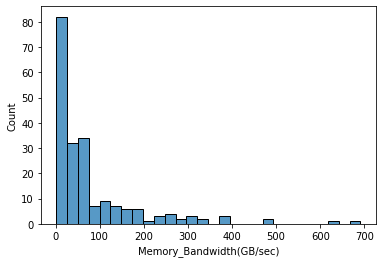

In [ ]:
sns.histplot(df['Memory_Bandwidth(GB/sec)'])

In [ ]:
df.loc[(df['Memory_Bandwidth(GB/sec)']==25.6),['Memory_Bandwidth(GB/sec)']]

,Memory_Bandwidth(GB/sec)
9,25.6
20,25.6
67,25.6
78,25.6
79,25.6
87,25.6
104,25.6
118,25.6
124,25.6
130,25.6


In [ ]:
df.loc[(df['Memory_Bandwidth(GB/sec)'].isnull()==True),['Memory_Bandwidth(GB/sec)']]=df['Memory_Bandwidth(GB/sec)'].mode()[0]
df.isnull().sum().sort_values()

Nome                          0
Shader                        0
SLI_Crossfire                 0
Memory_Type                   0
Notebook_GPU                  0
Memory_Speed(MHz)             0
Memory_Bandwidth(GB/sec)      0
L2_Cache(KB)                  0
Memory_Bus(Bit)               0
Integrated                    0
Dedicated                     0
Core_Speed(MHz)               0
Resolution_WxH               42
Memory                       49
Power_Connector              60
DVI_Connection               68
VGA_Connection               69
HDMI_Connection              72
Max_Power                    73
Process                      84
ROPs                         92
TMUs                         92
Texture_Rate                 94
Pixel_Rate                   94
Best_Resolution             107
PSU                         118
Boost_Clock                 186
DisplayPort_Connection      199
dtype: int64

## Resolution_W e Resolution_H

In [ ]:
Resolution_WxH=df['Resolution_WxH'].str.split('x',expand=True)
Resolution_WxH.rename({0:'Resolution_W',1:'Resolution_H'},axis=1,inplace=True)
df.insert(24,'Resolution_W',Resolution_WxH.Resolution_W.values)
df.insert(24,'Resolution_H',Resolution_WxH.Resolution_H.values)
df.drop('Resolution_WxH',axis=1,inplace=True)
df.Resolution_H=df.Resolution_H.astype(float)
df.Resolution_W=df.Resolution_W.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Nome                      220 non-null    object 
 1   Best_Resolution           113 non-null    object 
 2   Boost_Clock               34 non-null     object 
 3   Core_Speed(MHz)           220 non-null    float64
 4   DVI_Connection            152 non-null    float64
 5   Dedicated                 220 non-null    float64
 6   DisplayPort_Connection    21 non-null     float64
 7   HDMI_Connection           148 non-null    float64
 8   Integrated                220 non-null    float64
 9   L2_Cache(KB)              220 non-null    float64
 10  Max_Power                 147 non-null    object 
 11  Memory                    171 non-null    object 
 12  Memory_Bandwidth(GB/sec)  220 non-null    float64
 13  Memory_Bus(Bit)           220 non-null    float64
 14  Memory_Spe

In [ ]:
print('Resolution_W:',df.Resolution_W.mode()[0])
print('\nResolution_H:',df.Resolution_H.mode()[0])

Resolution_W: 2560.0

Resolution_H: 1600.0


In [ ]:
df.loc[(df.Resolution_W.isnull()==True),['Resolution_W']]=df.Resolution_W.mode()[0]
df.loc[(df.Resolution_H.isnull()==True),['Resolution_H']]=df.Resolution_H.mode()[0]
df.isnull().sum().sort_values()

Nome                          0
Shader                        0
Resolution_W                  0
Resolution_H                  0
SLI_Crossfire                 0
Memory_Type                   0
Notebook_GPU                  0
Memory_Bus(Bit)               0
Memory_Bandwidth(GB/sec)      0
Memory_Speed(MHz)             0
Integrated                    0
Core_Speed(MHz)               0
L2_Cache(KB)                  0
Dedicated                     0
Memory                       49
Power_Connector              60
DVI_Connection               68
VGA_Connection               69
HDMI_Connection              72
Max_Power                    73
Process                      84
ROPs                         92
TMUs                         92
Pixel_Rate                   94
Texture_Rate                 94
Best_Resolution             107
PSU                         118
Boost_Clock                 186
DisplayPort_Connection      199
dtype: int64

### Shader

In [ ]:
df.corr()['Shader'].sort_values(ascending=False)

Shader                    1.000000
HDMI_Connection           0.628195
Memory_Type               0.612460
Core_Speed(MHz)           0.575659
L2_Cache(KB)              0.441399
DisplayPort_Connection    0.352328
TMUs                      0.337946
SLI_Crossfire             0.325277
DVI_Connection            0.053080
Notebook_GPU              0.032354
VGA_Connection           -0.275558
Name: Shader, dtype: float64

In [ ]:
#Preparando Shader
df.loc[(df.Shader.isnull()==True),['Shader','L2_Cache(KB)','Memory_Type','Core_Speed(MHz)','SLI_Crossfire','HDMI_Connection']]

,Shader,L2_Cache(KB),Memory_Type,Core_Speed(MHz),SLI_Crossfire,HDMI_Connection
22,NaN,1024.0,5,1175.0,0.0,1.0
34,NaN,0.0,0,0.0,0.0,0.0
35,NaN,0.0,0,0.0,0.0,0.0
42,NaN,2048.0,7,1250.0,1.0,1.0
59,NaN,0.0,0,0.0,0.0,0.0
75,NaN,0.0,0,0.0,0.0,NaN
81,NaN,0.0,0,0.0,0.0,0.0
95,NaN,0.0,0,0.0,0.0,NaN
97,NaN,0.0,0,0.0,0.0,0.0
105,NaN,0.0,7,0.0,0.0,0.0


In [ ]:
df_shader_for_pred=df[['L2_Cache(KB)','Memory_Type','Core_Speed(MHz)']]
shader_pred=gs.best_estimator_.predict(df_shader_for_pred)
shader_pred

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


array([5.        , 5.        , 5.        , 2.08536585, 5.        ,
       2.08536585, 5.        , 5.        , 2.08536585, 2.08536585,
       5.        , 2.08536585, 5.        , 5.        , 5.        ,
       5.        , 5.        , 2.08536585, 5.        , 2.08536585,
       2.08536585, 2.08536585, 5.        , 5.        , 2.08536585,
       5.        , 2.08536585, 5.        , 2.08536585, 2.08536585,
       2.08536585, 5.        , 5.        , 2.08536585, 2.08536585,
       2.08536585, 2.08536585, 5.        , 5.        , 2.08536585,
       2.08536585, 5.        , 5.        , 2.08536585, 2.08536585,
       2.08536585, 2.08536585, 5.        , 5.        , 5.        ,
       2.08536585, 5.        , 2.08536585, 5.        , 5.        ,
       5.        , 5.        , 2.08536585, 2.08536585, 2.08536585,
       2.08536585, 2.08536585, 5.        , 5.        , 2.08536585,
       2.08536585, 2.08536585, 5.        , 2.08536585, 2.08536585,
       5.        , 2.08536585, 2.08536585, 2.08536585, 5.     

In [ ]:
#Ajustando predição para Series
shader_pred=shader_pred.astype(int)
shared_pred=pd.Series(shader_pred, index=df_shader_for_pred.index)
shared_pred
#Substituindo os valores NaN do data3 com os valores preditos
df.loc[(df.Shader.isnull()==True),['Shader']]=shared_pred
#Verificando
df.Shader[df_shader_for_pred.index]

,Shader


## Normalizando

In [ ]:
df[colunasX].isnull().sum()

Shader                      0
SLI_Crossfire               0
Resolution_W                0
Resolution_H                0
Notebook_GPU                0
Memory_Speed(MHz)           0
Memory_Bus(Bit)             0
Memory_Bandwidth(GB/sec)    0
Memory_Type                 0
Integrated                  0
Dedicated                   0
Core_Speed(MHz)             0
L2_Cache(KB)                0
dtype: int64

In [ ]:
#Vamos normalizar os dados
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(df[colunasX])
minmax_df = pd.DataFrame(minmax_df, columns =[colunasX])
minmax_df

,Shader,SLI_Crossfire,Resolution_W,Resolution_H,Notebook_GPU,Memory_Speed(MHz),Memory_Bus(Bit),Memory_Bandwidth(GB/sec),Memory_Type,Integrated,Dedicated,Core_Speed(MHz),L2_Cache(KB)
0,1.000000,1.0,0.44,0.344660,0.0,0.604627,1.000000,0.925840,0.833333,0.0,1.0,0.587239,0.333333
1,1.000000,1.0,0.60,0.660194,0.0,0.869085,0.733333,0.486385,0.833333,0.0,1.0,0.622247,1.000000
2,1.000000,1.0,0.44,0.344660,0.0,0.578339,0.466667,0.221321,0.833333,0.0,1.0,0.564653,0.166667
3,0.459459,0.0,0.20,0.174757,1.0,0.236593,0.200000,0.024334,0.333333,0.0,1.0,0.000000,0.000000
4,1.000000,0.0,0.20,0.174757,1.0,0.368034,0.200000,0.073001,0.833333,0.0,1.0,0.367024,0.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,0.729730,0.0,0.20,0.174757,1.0,0.298107,0.066667,0.014340,0.333333,1.0,0.0,0.000000,0.000000
216,0.189189,0.0,0.20,0.174757,0.0,0.157729,0.200000,0.017381,0.166667,0.0,1.0,0.000000,0.000000
217,0.459459,0.0,0.20,0.174757,0.0,0.157729,0.066667,0.008111,0.166667,1.0,0.0,0.000000,0.000000
218,0.459459,1.0,0.20,0.174757,0.0,0.122503,0.066667,0.006518,0.166667,0.0,1.0,0.000000,0.000000


## Predição

In [ ]:
#Realizando a Inferência com o Modelo Trainado
y_pred = model.predict(minmax_df)
print(y_pred)

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 3.7022606e-32 1.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00]
 [0.0000000e+00 0.0000000e+00 1.9198974e-29 1.0221461e-14 1.0000000e+00]
 ...
 [1.8424627e-05 9.9997497e-01 6.5775907e-06 2.5483867e-08 2.1171306e-17]
 [1.9648219e-03 9.9722302e-01 8.1067969e-04 1.5484063e-06 1.0387474e-11]
 [2.5546886e-24 6.6225601e-11 1.0000000e+00 9.0735837e-09 5.3874413e-15]]


In [ ]:
y_pred_onehot = y_pred.argmax(axis=1) #Tomando o valor máximo
directx_pred=y_pred_onehot+8 #Como o valor predito era o resto da divisão por 8 então somamos para retornar ao valor correto
directx_pred

array([12, 12, 12,  9, 12, 11, 12, 12, 11, 10, 12, 10, 12, 10, 12, 12, 12,
        9, 12,  9, 10,  9, 12, 12, 10, 12, 10, 12,  9,  8, 10, 10, 10,  9,
        9,  8, 10, 12, 12, 11,  8, 12, 12, 11, 10,  9, 10, 12, 12, 11, 10,
       12,  8, 12, 12, 12, 10, 11, 10,  8, 10,  9, 12, 10,  8, 10,  8, 12,
       11,  9, 12, 11,  9,  8, 12,  9,  9, 10,  9, 11,  8,  8, 12, 12,  9,
       11, 12, 11,  8, 12, 12, 11, 10, 12, 12,  8, 12,  8, 12, 10, 12, 11,
       10,  9, 11, 10, 12, 10, 10,  8, 12, 10, 10, 11, 12, 12, 12, 12, 10,
        8, 10, 11,  9,  9, 12, 12, 10, 10, 10, 12, 12, 12,  9, 11,  9, 10,
        8, 12, 11,  8, 12, 11, 12, 12, 12, 11, 12, 12, 12, 10, 11, 10, 11,
        8,  9, 11, 10,  8, 11, 10,  9, 12, 12, 11, 12,  8, 10,  9, 11,  9,
       12,  9, 12, 11,  9,  9,  8,  8,  9, 10, 12, 12, 10, 12, 12, 12, 12,
       12, 12, 11,  8, 10,  9, 10, 10, 12,  9, 10, 11, 12,  8, 12, 10, 10,
       10,  9,  8,  9, 10,  9, 10, 11,  8, 10, 12, 10,  9,  9,  9, 10])

## Extração

In [ ]:
df_submission=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CIDAMO/Unidade IV/4-desafio-cidamo-2022/Sample_Submission.csv')
df_submission

,Nome,DirectX
0,M76XNVTL4M4ULZCFPEG95AHFECWN90T2JARFXG209YG,11
1,7QUDV2P0AH29CTIFMANEW6YY56ZZMU0EEWQBTGL3V7Z8UQ,12
2,ZXD50ONA8MZUHE1NY21ZUZ4BOFXZ9X0,9
3,AO86XNGN8L42G2Z,12
4,HM3LPJ50FKGK45O,9
...,...,...
215,TWQEDZEYC2G,12
216,NWBFJQ60KW7ED39,9
217,4XNTK981BPTU4C,12
218,T3UN6IX4HZD3WX8,9


In [ ]:
df_submission.drop('DirectX',axis=1,inplace=True)
df_submission.insert(1,'DirectX',directx_pred)
df_submission

,Nome,DirectX
0,M76XNVTL4M4ULZCFPEG95AHFECWN90T2JARFXG209YG,12
1,7QUDV2P0AH29CTIFMANEW6YY56ZZMU0EEWQBTGL3V7Z8UQ,12
2,ZXD50ONA8MZUHE1NY21ZUZ4BOFXZ9X0,12
3,AO86XNGN8L42G2Z,9
4,HM3LPJ50FKGK45O,12
...,...,...
215,TWQEDZEYC2G,10
216,NWBFJQ60KW7ED39,9
217,4XNTK981BPTU4C,9
218,T3UN6IX4HZD3WX8,9


In [ ]:
df_submission.to_csv('submission2.csv',index=False)